In [1]:
# Kristina Fauss
# April 19, 2024
# model selection by AIC testing all 1st order interactions

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import statsmodels.formula.api as smf

from ols_mixedef_custom import *

In [2]:
fp = '/Users/kristinafauss/BackupToBox/Git/lab-flammability-testing-2022/data/processed-data/main_dataset.csv'

flamog = pd.read_csv(fp)

# drop na's for flam metrics
print(len(flamog))
for col in ['fh', 'fd', 'pfg', 'temp_change', 'heat_flux_change']:
    flamog.dropna(subset=col, inplace=True)
print(len(flamog))

flamog['plant_id']=[str(a)+'_'+str(b) for a,b in zip(flamog['plant'], flamog['species'])]

# report
print(flamog.columns)
flamog.head()

172
171
Index(['Unnamed: 0', 'species', 'plant', 'date', 'total_branch_mass',
       'total_leaf_mass', 'stem_mass_ratio', 'leaf_mass_ratio', 'leaf_lfm',
       'thickness', 'leaf_wet_mass', 'leaf_dry_mass', 'stem_lfm', 'stem_width',
       'stem_wet_mass', 'stem_dry_mass', 'stem_sav', 'lfm', 'leaf_dmc',
       'stem_dmc', 'dmc', 'leaf_area', 'leaf_sav', 'LMA', 'SLA', 'rep',
       'branch_length', 'branch_width', 'branch_height', 'sample_wt',
       'no_branches', 'mpa', 'notes_on_plant_char', 'start_time',
       'ambient_temp', 'ambient_humidity', 'pre_ignition_glow',
       'first_glow_time', 'ignition', 'primary_ignition',
       'primary_time_of_flame_end', 'secondary_ignition',
       'secondary_time_of_flame_end', 'third_ignition',
       'third_time_of_ignition_flame_end', 'time_fh', 'fh', 'time_of_glow_end',
       'end_time', 'thermocoupler_height', 'hotplate_height',
       'notes_on_flam_data', 'fd', 'tti', 'pfg', 'max_temp',
       'time_at_max_temp', 'max_temp_sensor', '

,Unnamed: 0,species,plant,date,total_branch_mass,total_leaf_mass,stem_mass_ratio,leaf_mass_ratio,leaf_lfm,thickness,...,wet_mass,dry_mass,gdw_gfw,dw_flam_sample,ww_flam_sample,branch_volume,branching,sample_density,dw_sppdev,plant_id
0,1,ARCDEN,1,2022-08-10,20.347,19.505,0.510564,0.489436,251.06912,0.514,...,1.151,0.3683,0.242414,1.291195,4.035205,1082.04,0.416667,0.004923,0.923122,1_ARCDEN
1,2,ARCDEN,1,2022-08-10,20.347,19.505,0.510564,0.489436,251.06912,0.514,...,1.151,0.3683,0.242414,1.429372,4.467028,1370.20,0.322581,0.004303,1.348152,1_ARCDEN
2,3,ARCDEN,1,2022-08-10,20.347,19.505,0.510564,0.489436,251.06912,0.514,...,1.151,0.3683,0.242414,1.283923,4.012477,682.04,0.294118,0.007766,0.900752,1_ARCDEN
3,4,ARCDEN,1,2022-08-10,20.347,19.505,0.510564,0.489436,251.06912,0.514,...,1.151,0.3683,0.242414,1.283923,4.012477,1262.25,0.466667,0.004196,0.900752,1_ARCDEN
4,5,ARCDEN,1,2022-08-10,20.347,19.505,0.510564,0.489436,251.06912,0.514,...,1.151,0.3683,0.242414,0.811215,2.535185,819.00,0.500000,0.004086,-0.553297,1_ARCDEN


In [3]:
model = smf.mixedlm("fh ~ total_branch_mass + species", data=flamog, groups=flamog["plant_id"])
results = model.fit(reml=False)
results.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:               MixedLM   Dependent Variable:   fh       
No. Observations:    171       Method:               ML       
No. Groups:          58        Scale:                51.4006  
Min. group size:     1         Log-Likelihood:       -610.5181
Max. group size:     11        Converged:            Yes      
Mean group size:     2.9                                      
--------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------------------------------
Intercept           1.807    8.316  0.217 0.828 -14.492 18.106
species[T.ARTCAL]  -1.429    5.410 -0.264 0.792 -12.032  9.174
species[T.CEAGRI]   6.016    5.222  1.152 0.249  -4.219 16.250
species[T.ERIKAR] -12.658    5.016 -2.524 0.012 -22.489 -2.828
species[T.HETARB]  11.932    5.969  1.999 0.046   0.234 23.630
species[T.MALLAU]  -2.647    5.945 -0.445 0.656 -14.299  9.006
species[T.SALAPI]   0.198    5.375  0.037 0.971 -10.336 10.732
species[T.SALLEU]  -2.810    5.085 -0.553 0.581 -12.777  7.157
total_branch_mass   1.146    0.360  3.181 0.001   0.440  1.852
Group Var          38.508    2.421                            
==============================================================

"""

In [4]:
results.aic

1243.0361180203022

# Examine Correlation & Structure in Num. Var's

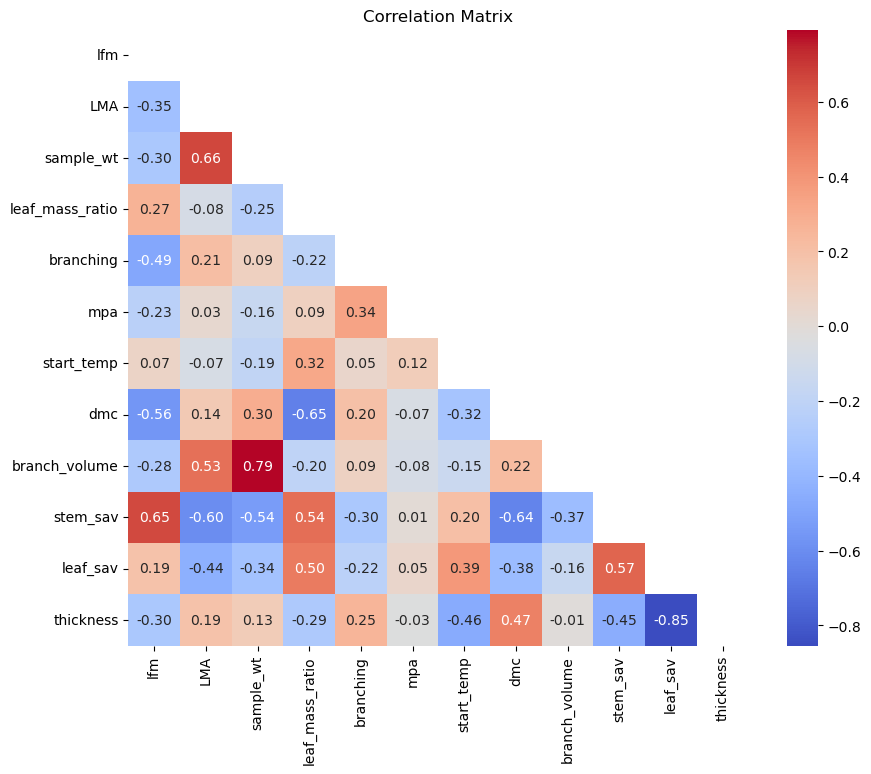

In [5]:
cols_num_use = ['lfm', 'LMA', 'sample_wt', 'leaf_mass_ratio', 'branching', 'mpa', 'start_temp', 'dmc', 'branch_volume', 'stem_sav', 'leaf_sav', 'thickness']

corrplot(flamog, cols_num_use)

In [6]:
# PCAplot(flamog, cols_num_use)

# Modeling Preprocessing

In [7]:
# scale and center
cols_all = ['fh', 'fd', 'temp_change', 'heat_flux_change'] + cols_num_use
flam = scale_and_center(flamog, cols_all, cols_no_change=['plant_id', 'species', 'ignition'])

# declare as factors
flam['species'] = pd.Categorical(flam['species'])
flam['plant_id'] = pd.Categorical(flam['plant_id'])
flam['ignition'] = pd.Categorical(flam['ignition'])

# drop na's
print(len(flam))
cols_all_dpna = cols_all + ['plant_id', 'species', 'ignition']
flam.dropna(subset=cols_all_dpna, inplace=True)
print(len(flam))

# declare all possible IV cols to model
cols_use = cols_num_use + ['species']
print(cols_use)

171
166
['lfm', 'LMA', 'sample_wt', 'leaf_mass_ratio', 'branching', 'mpa', 'start_temp', 'dmc', 'branch_volume', 'stem_sav', 'leaf_sav', 'thickness', 'species']


# Run Model Selector

### NOTE: Random effect is simply `plant_id`
- NO nested effects
- NO `species'

#### It was not possible to test all combinations. Therefore, only combinations of significnt interaction terms and all singletons will be tested.

In [8]:
maxnumsingle = 5
minnumsingle = 1

# Flame Height

In [9]:
# REDUCE INTERACTIONS TO TEST

Y_VAR = 'fh'

# singletons: y = b + mx
compare_predictors_mixedeff(flam, cols_num_use, yvar=Y_VAR)

print('\n\n')

# singleton interactions: y = b + m1x1 + m2x2 + m3x1x2
sig_interactions = compare_predictors_interaction_singletons(flam,cols_use, y=Y_VAR, thresh=0.05, probs = [], printsumm=0)

print('\n\n')

# # try all 2-way interactions in 1 model
# form_all_int = formula_all_2way_interactions(cols_use, y='fh', report=0)
# model = smf.mixedlm(form_all_int, data=flam, groups=flam["plant_id"])
# result = model.fit(reml=False)
# # print only significant results
# significant_results = result.summary().tables[1].loc[result.pvalues < 0.05]
# print(significant_results)

print('\n\n')

# generate list of known interactions

sig_interactions_tuples = [tuple(x.split('*')) for x in sig_interactions]
for pair in sig_interactions_tuples:
    print(pair)

               cols         pvals     coefs  significant
2         sample_wt  2.290442e-17  0.531690         True
9          stem_sav  8.211280e-11 -0.576347         True
1               LMA  1.686945e-06  0.448328         True
8     branch_volume  1.785638e-06  0.328704         True
3   leaf_mass_ratio  1.627335e-05 -0.473655         True
4         branching  2.782677e-05  0.276897         True
0               lfm  1.956642e-04 -0.386256         True
7               dmc  1.914826e-03  0.275048         True
10         leaf_sav  5.369394e-03 -0.305540         True
5               mpa  2.542692e-01  0.088750        False
6        start_temp  3.136141e-01  0.077621        False
11        thickness  3.205268e-01  0.115109        False



ERROR: Formula model error: fh ~ LMA*species
13 13 {'leaf_sav', 'branching', 'thickness', 'stem_sav', 'LMA', 'mpa', 'sample_wt', 'branch_volume', 'leaf_mass_ratio', 'start_temp', 'species', 'dmc', 'lfm'}






('lfm', 'sample_wt')
('lfm', 'dmc')
('lfm', 'b

28672
28672 28672
fh ~ lfm*branch_volume + sample_wt + branching + mpa + start_temp + stem_sav
                            OLS Regression Results                            
Dep. Variable:                     fh   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     37.88
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           5.68e-33
Time:                        14:39:10   Log-Likelihood:                -143.36
No. Observations:                 166   AIC:                             304.7
Df Residuals:                     157   BIC:                             332.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

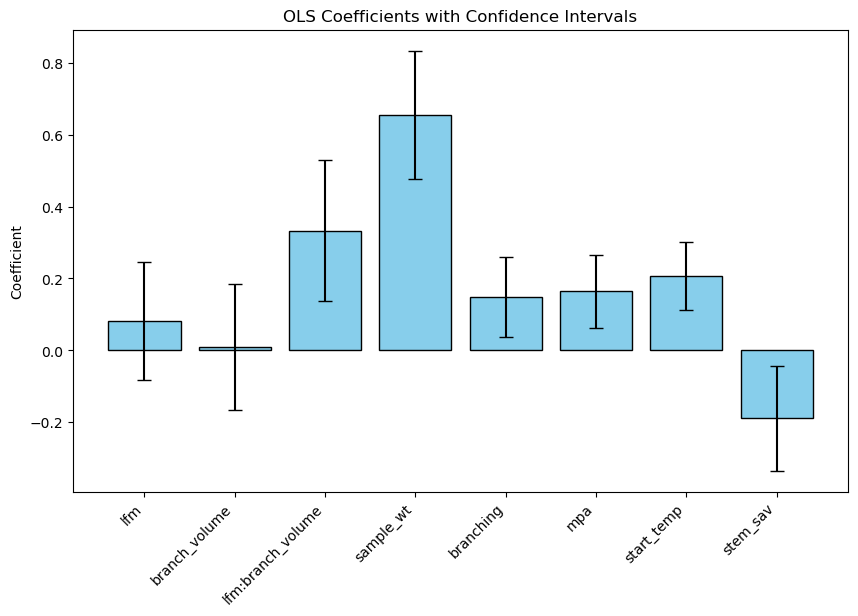

In [10]:
# generate list of formulas

df = flam
cols = cols_use
int_tuple_list = sig_interactions_tuples
dv = Y_VAR


formulas = []
cols_used = []

# iterate over possible interactions
for int_tup in int_tuple_list:
    
    # create a copy of singletons list
    cols_wkg = cols.copy()
    # isolate terms in interaction
    x1,x2 = int_tup
    # drop those terms from singletons list
    cols_wkg.remove(x1)
    cols_wkg.remove(x2)
    
    # add the 1st formula - just the interaction term y ~ x1 * x2
    formulas.append(dv+' ~ '+x1+'*'+x2)
    colsi = [x1,x2]

    # generate list of all possible combos of singletons, from 1 to as many as there are
    singles_combos = [list(combinations(cols_wkg, n)) for n in range(minnumsingle, maxnumsingle+1)]

    # iterate over combo set (ie 1 poss singleton, 2 poss singletons, ... etc)
    for comboset in singles_combos:
        # for each combo in the combo set
        for combo in comboset:
            # generate formula
            form = dv+' ~ '+x1+'*'+x2
            for single in combo:
                form+=' + '+single
                colsi.append(single)
            formulas.append(form)
            cols_used.append([colsi])

print(len(formulas))

# AIC ITERATION
resdf_fh, num_top_models = AICscore_from_all_pos_2way_interactions(df, formulas, report=0)

# report
for idx,row in resdf_fh[0:num_top_models].iterrows():
    formula = row.Formula
    print(formula)
for idx,row in resdf_fh[0:num_top_models].iterrows():
    formula = row.Formula
    model = smf.ols(formula, data=df)
    results = model.fit()
    print(results.summary())
    plot_ols_coefficients(results)
    plt.show();
    # if 'species' in cols:
    #     cols.remove('species')
    # plot_resid(df, cols, results)

# Flame Duration

In [11]:
# REDUCE INTERACTIONS TO TEST

Y_VAR = 'fd'

# singletons: y = b + mx
compare_predictors_mixedeff(flam, cols_num_use, yvar=Y_VAR)

print('\n\n')

# singleton interactions: y = b + m1x1 + m2x2 + m3x1x2
sig_interactions = compare_predictors_interaction_singletons(flam,cols_use, y=Y_VAR, thresh=0.05, probs = [], printsumm=0)

print('\n\n')

# # try all 2-way interactions in 1 model
# form_all_int = formula_all_2way_interactions(cols_use, y='fh', report=0)
# model = smf.mixedlm(form_all_int, data=flam, groups=flam["plant_id"])
# result = model.fit(reml=False)
# # print only significant results
# significant_results = result.summary().tables[1].loc[result.pvalues < 0.05]
# print(significant_results)

print('\n\n')

# generate list of known interactions

sig_interactions_tuples = [tuple(x.split('*')) for x in sig_interactions]
for pair in sig_interactions_tuples:
    print(pair)

               cols         pvals     coefs  significant
2         sample_wt  2.181882e-11  0.499795         True
8     branch_volume  1.223520e-06  0.372319         True
7               dmc  2.344202e-06  0.390794         True
9          stem_sav  2.513616e-06 -0.385912         True
0               lfm  6.575573e-05 -0.348868         True
1               LMA  7.605417e-05  0.362449         True
3   leaf_mass_ratio  4.525313e-04 -0.380075         True
10         leaf_sav  7.496719e-03 -0.272524         True
4         branching  1.364565e-02  0.206268         True
11        thickness  6.348566e-02  0.204278        False
6        start_temp  3.760549e-01 -0.077204        False
5               mpa  5.031638e-01 -0.064662        False



13 13 {'leaf_sav', 'branching', 'thickness', 'stem_sav', 'LMA', 'mpa', 'sample_wt', 'branch_volume', 'leaf_mass_ratio', 'start_temp', 'species', 'dmc', 'lfm'}






('lfm', 'sample_wt')
('lfm', 'stem_sav')
('LMA', 'leaf_sav')
('LMA', 'thickness')
('LMA', '

14336
ERROR: Formula model error: fd ~ LMA*species + sample_wt + thickness
ERROR: Formula model error: fd ~ LMA*species + branching + thickness
ERROR: Formula model error: fd ~ LMA*species + mpa + start_temp
ERROR: Formula model error: fd ~ LMA*species + sample_wt + leaf_mass_ratio + thickness
ERROR: Formula model error: fd ~ LMA*species + sample_wt + branching + start_temp
ERROR: Formula model error: fd ~ LMA*species + sample_wt + mpa + start_temp
ERROR: Formula model error: fd ~ LMA*species + sample_wt + dmc + leaf_sav
ERROR: Formula model error: fd ~ LMA*species + mpa + dmc + branch_volume
ERROR: Formula model error: fd ~ LMA*species + start_temp + dmc + leaf_sav
ERROR: Formula model error: fd ~ LMA*species + start_temp + stem_sav + thickness
ERROR: Formula model error: fd ~ LMA*species + dmc + branch_volume + stem_sav
ERROR: Formula model error: fd ~ LMA*species + dmc + branch_volume + thickness
ERROR: Formula model error: fd ~ LMA*species + lfm + leaf_mass_ratio + start_temp + lea

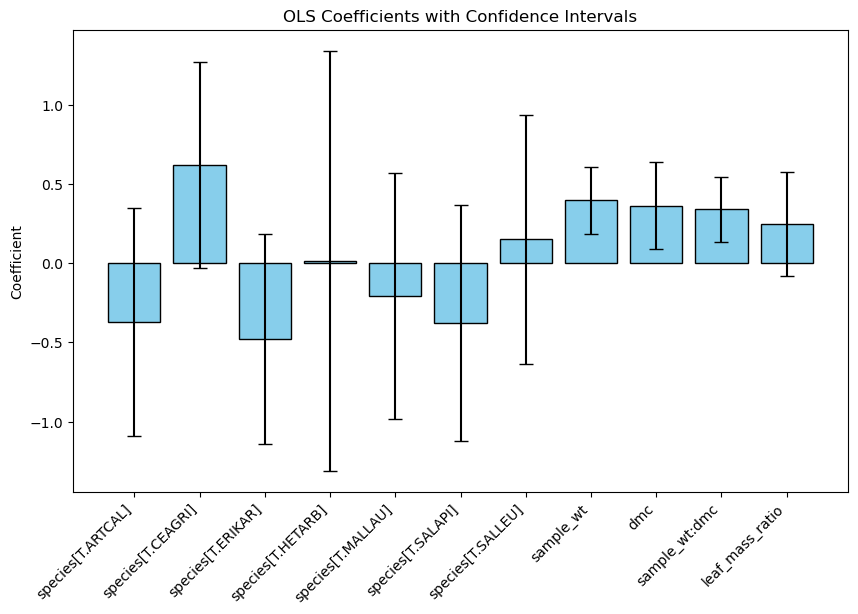

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     8.173
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           8.18e-14
Time:                        16:38:25   Log-Likelihood:                -183.92
No. Observations:                 166   AIC:                             401.8
Df Residuals:                     149   BIC:                             454.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

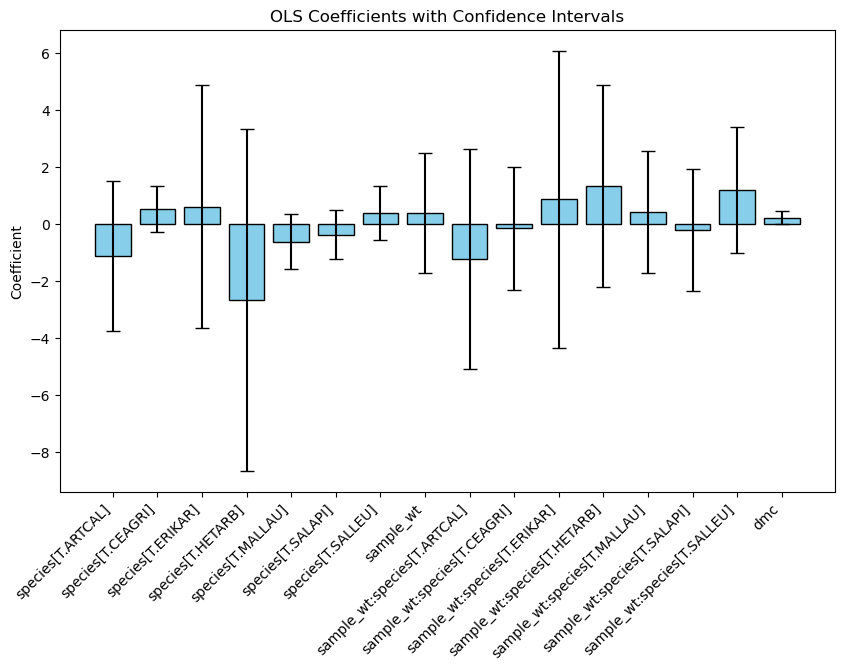

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     11.57
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.04e-14
Time:                        16:38:25   Log-Likelihood:                -189.93
No. Observations:                 166   AIC:                             401.9
Df Residuals:                     155   BIC:                             436.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0164      0.29

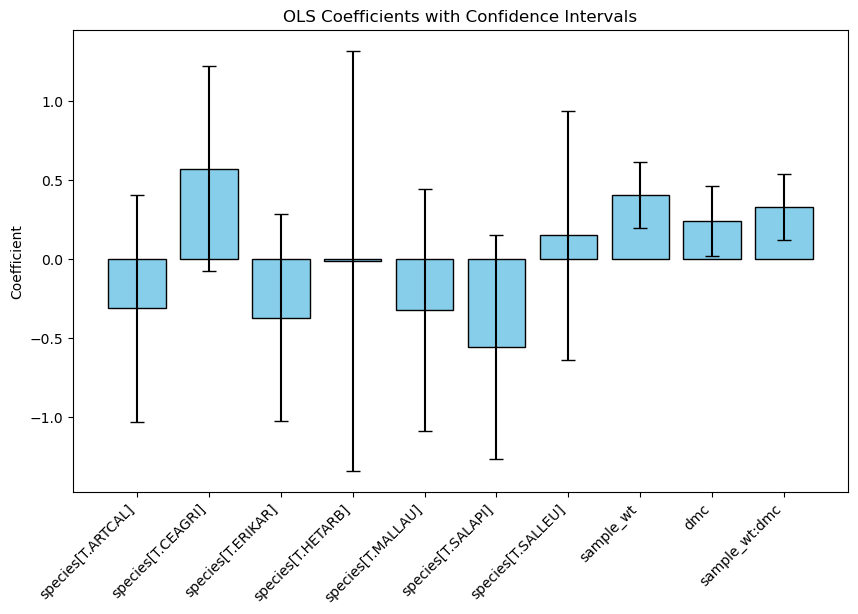

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     10.04
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           2.41e-14
Time:                        16:38:25   Log-Likelihood:                -188.00
No. Observations:                 166   AIC:                             402.0
Df Residuals:                     153   BIC:                             442.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0119      0.29

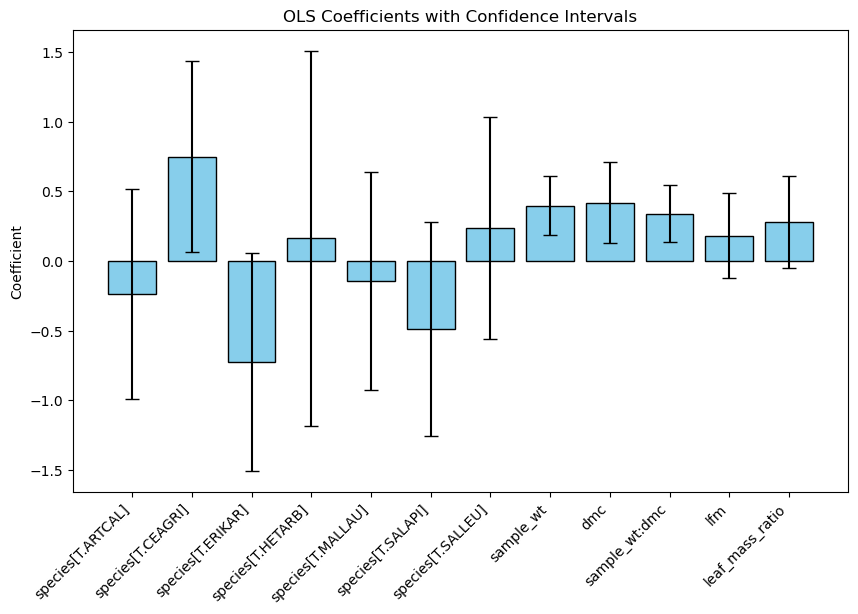

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     7.785
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.34e-13
Time:                        16:38:26   Log-Likelihood:                -183.19
No. Observations:                 166   AIC:                             402.4
Df Residuals:                     148   BIC:                             458.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

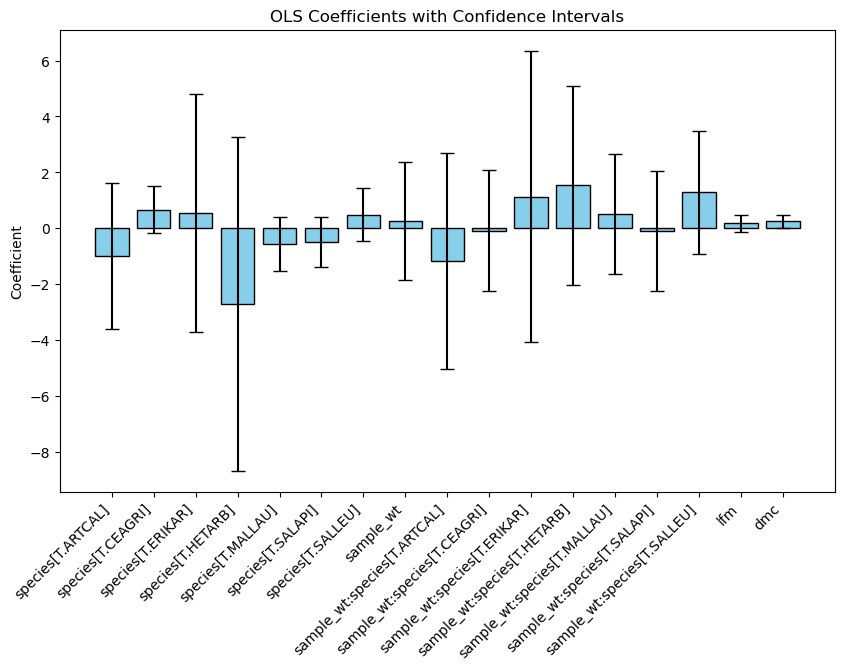

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     7.780
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.37e-13
Time:                        16:38:26   Log-Likelihood:                -183.21
No. Observations:                 166   AIC:                             402.4
Df Residuals:                     148   BIC:                             458.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

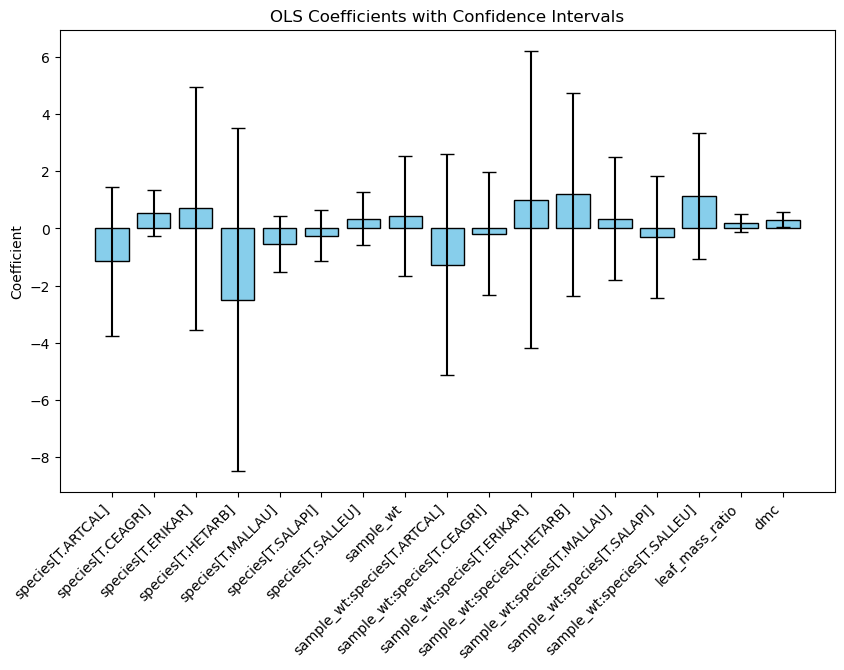

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     7.482
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.82e-13
Time:                        16:38:26   Log-Likelihood:                -182.23
No. Observations:                 166   AIC:                             402.5
Df Residuals:                     147   BIC:                             461.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

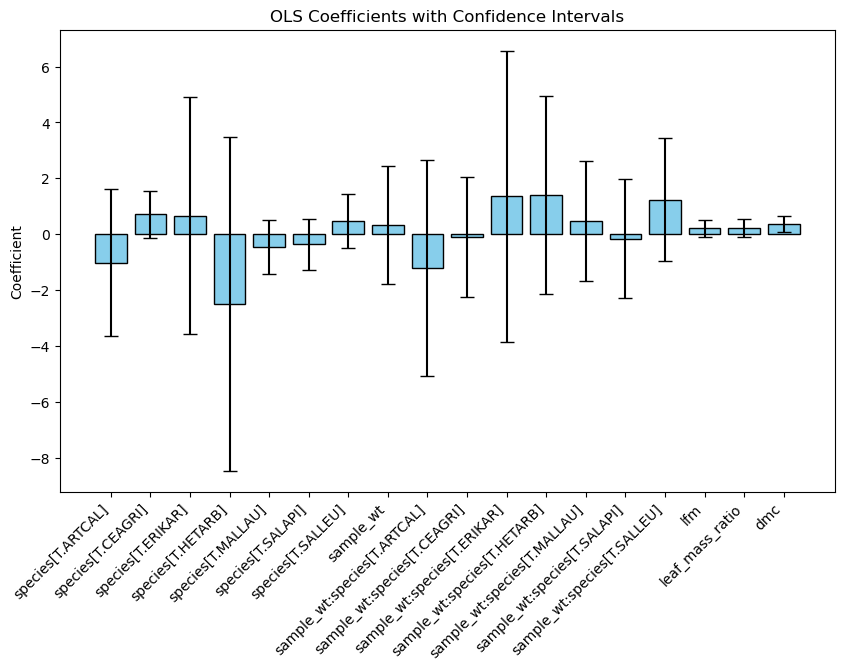

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     9.987
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           2.85e-14
Time:                        16:38:26   Log-Likelihood:                -188.20
No. Observations:                 166   AIC:                             402.4
Df Residuals:                     153   BIC:                             442.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0639      0.29

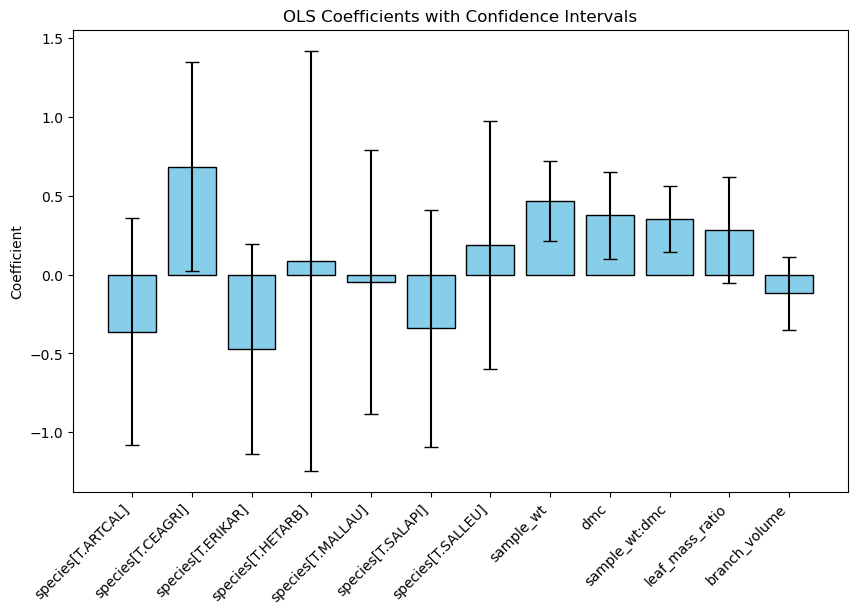

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     9.958
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           3.11e-14
Time:                        16:38:27   Log-Likelihood:                -188.30
No. Observations:                 166   AIC:                             402.6
Df Residuals:                     153   BIC:                             443.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0520      0.29

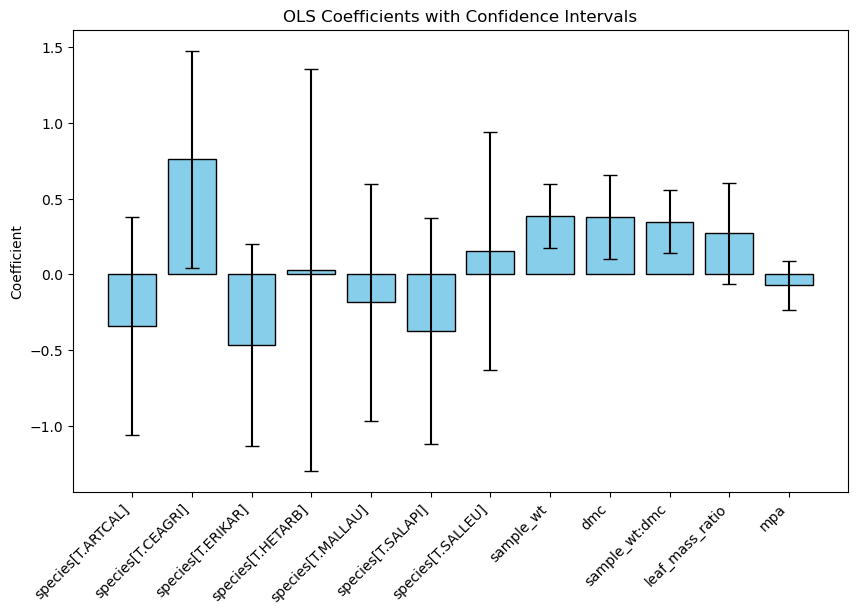

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     7.456
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           2.03e-13
Time:                        16:38:27   Log-Likelihood:                -182.37
No. Observations:                 166   AIC:                             402.7
Df Residuals:                     147   BIC:                             461.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

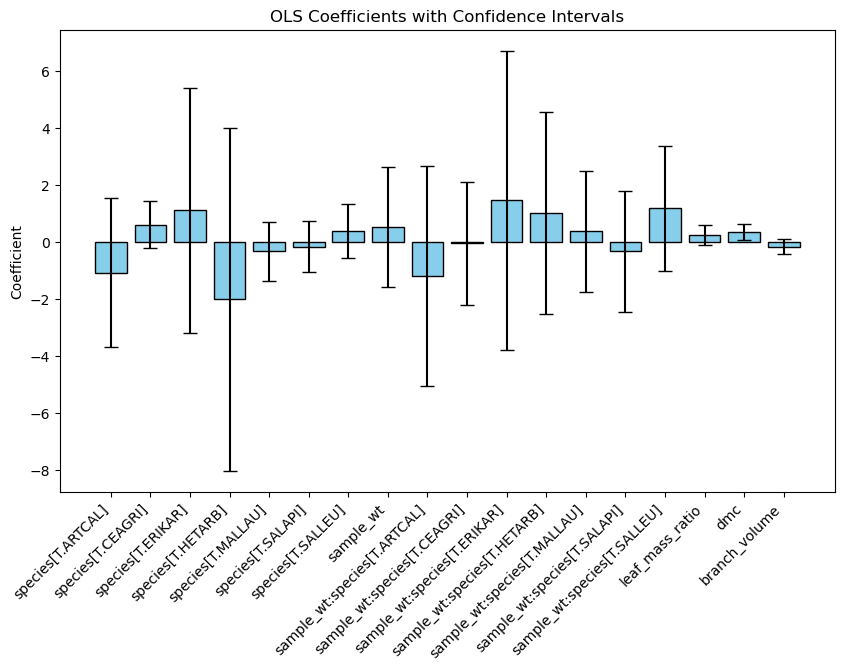

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     7.726
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.70e-13
Time:                        16:38:27   Log-Likelihood:                -183.48
No. Observations:                 166   AIC:                             403.0
Df Residuals:                     148   BIC:                             459.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

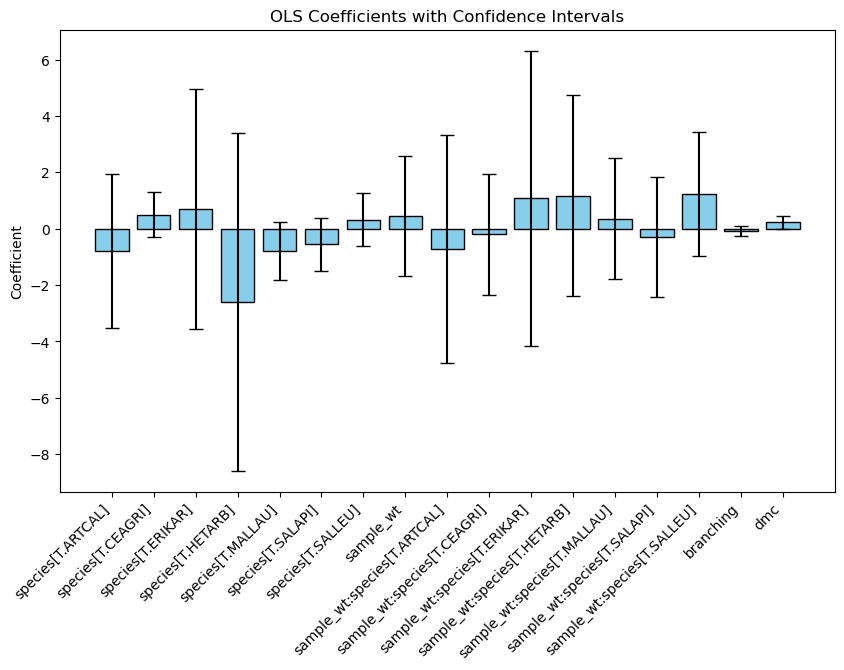

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     10.58
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           2.50e-14
Time:                        16:38:27   Log-Likelihood:                -189.48
No. Observations:                 166   AIC:                             403.0
Df Residuals:                     154   BIC:                             440.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0112      0.29

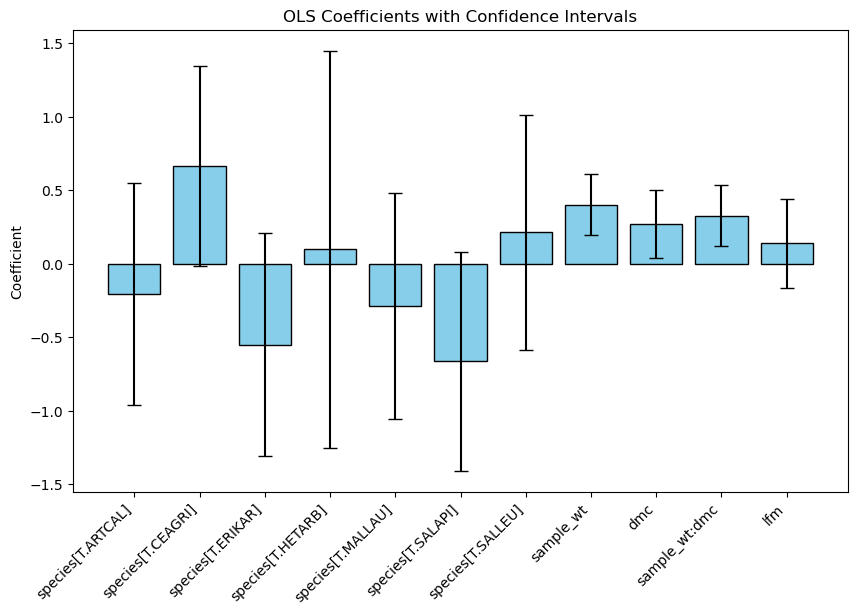

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     7.716
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.77e-13
Time:                        16:38:27   Log-Likelihood:                -183.53
No. Observations:                 166   AIC:                             403.1
Df Residuals:                     148   BIC:                             459.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

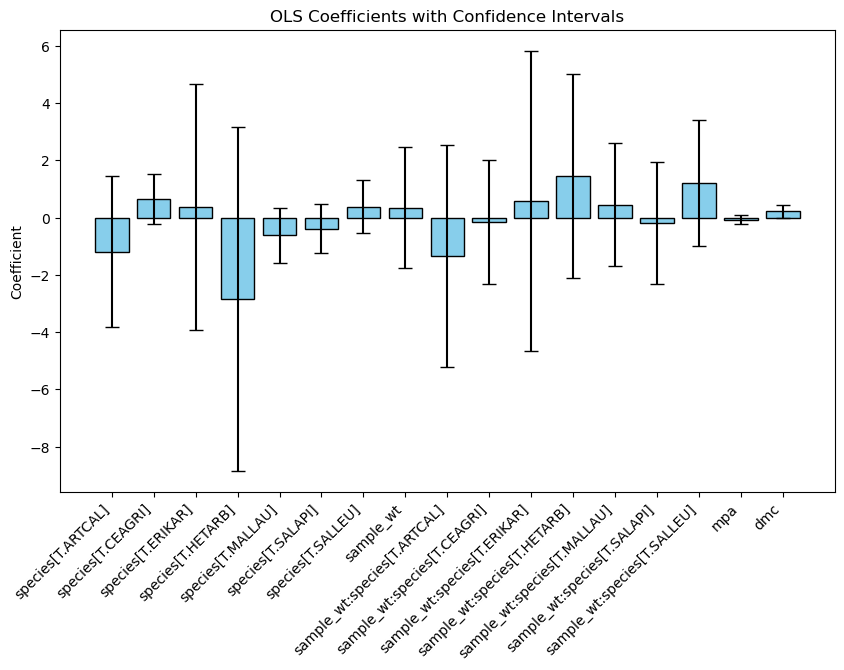

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     7.715
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.78e-13
Time:                        16:38:28   Log-Likelihood:                -183.54
No. Observations:                 166   AIC:                             403.1
Df Residuals:                     148   BIC:                             459.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

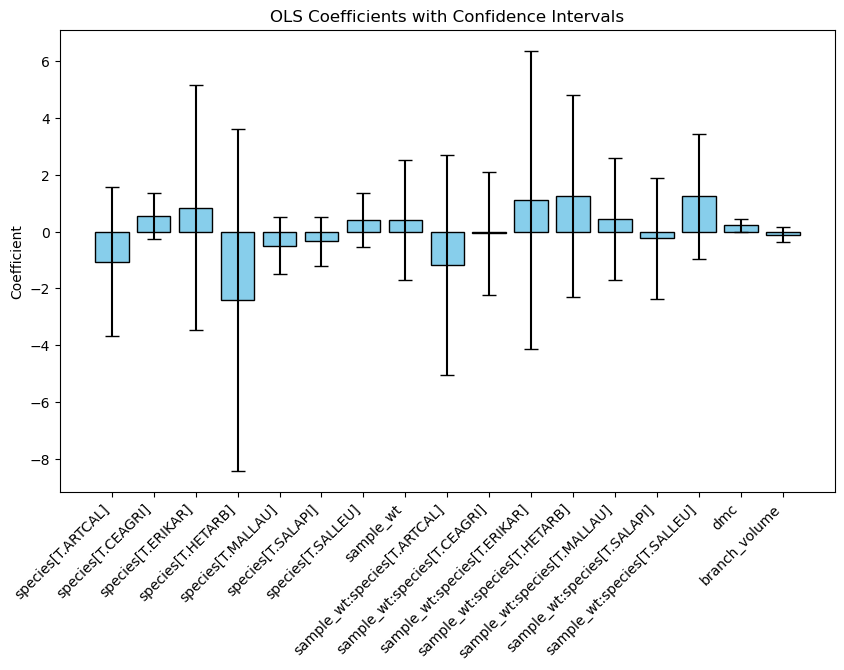

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     9.884
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           3.91e-14
Time:                        16:38:28   Log-Likelihood:                -188.57
No. Observations:                 166   AIC:                             403.1
Df Residuals:                     153   BIC:                             443.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0672      0.30

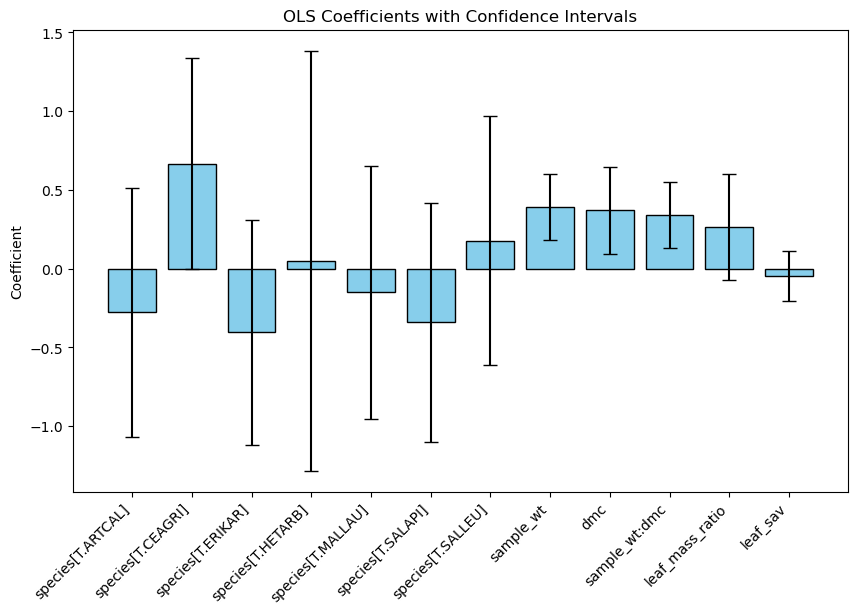

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     9.297
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           5.86e-14
Time:                        16:38:28   Log-Likelihood:                -187.65
No. Observations:                 166   AIC:                             403.3
Df Residuals:                     152   BIC:                             446.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0424      0.29

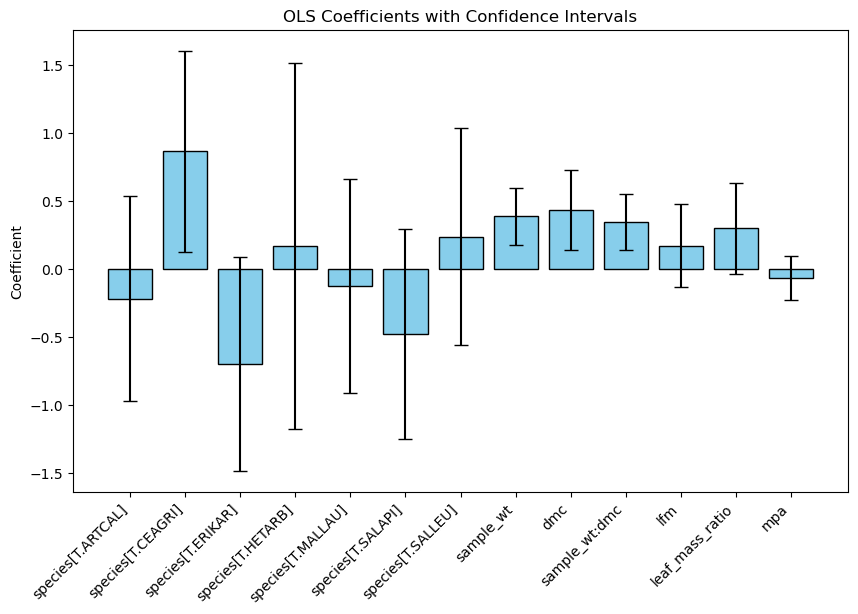

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     9.312
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           5.58e-14
Time:                        16:38:28   Log-Likelihood:                -187.59
No. Observations:                 166   AIC:                             403.2
Df Residuals:                     152   BIC:                             446.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0522      0.29

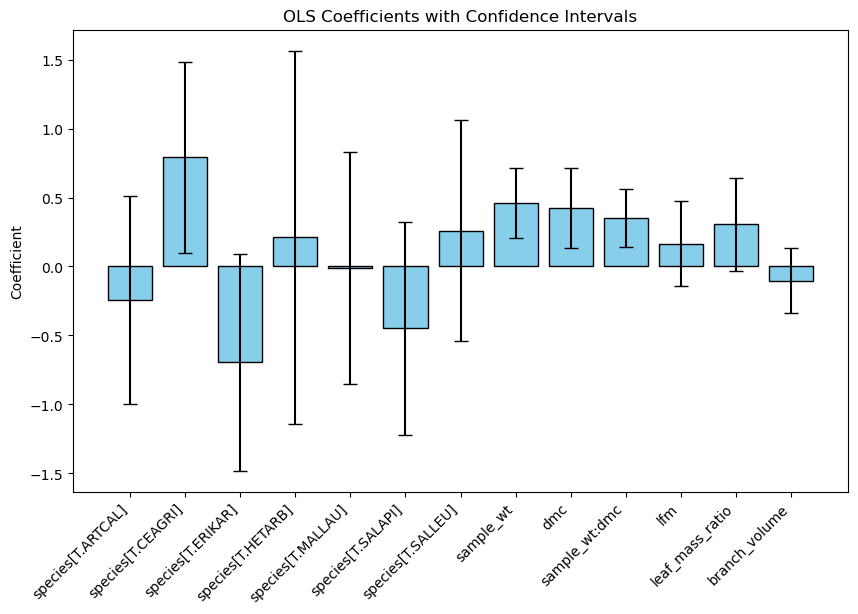

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     7.688
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.98e-13
Time:                        16:38:29   Log-Likelihood:                -183.68
No. Observations:                 166   AIC:                             403.4
Df Residuals:                     148   BIC:                             459.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

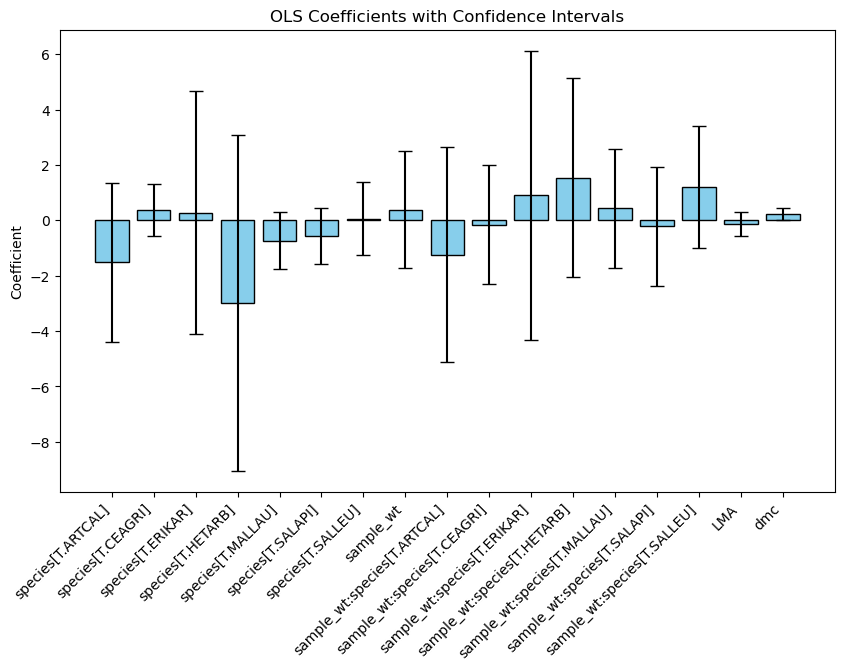

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     7.398
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           2.58e-13
Time:                        16:38:29   Log-Likelihood:                -182.68
No. Observations:                 166   AIC:                             403.4
Df Residuals:                     147   BIC:                             462.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

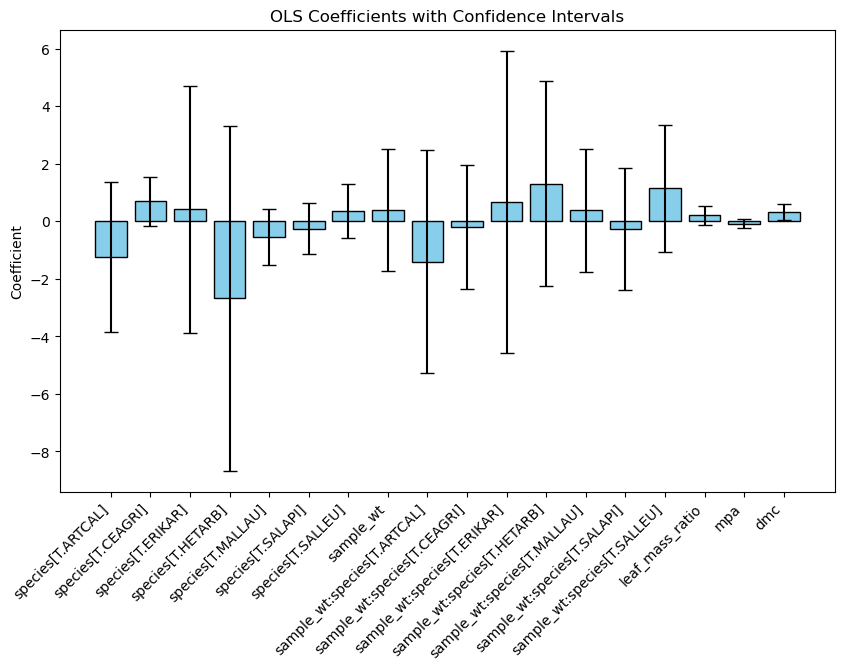

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     7.137
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           3.35e-13
Time:                        16:38:29   Log-Likelihood:                -181.69
No. Observations:                 166   AIC:                             403.4
Df Residuals:                     146   BIC:                             465.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

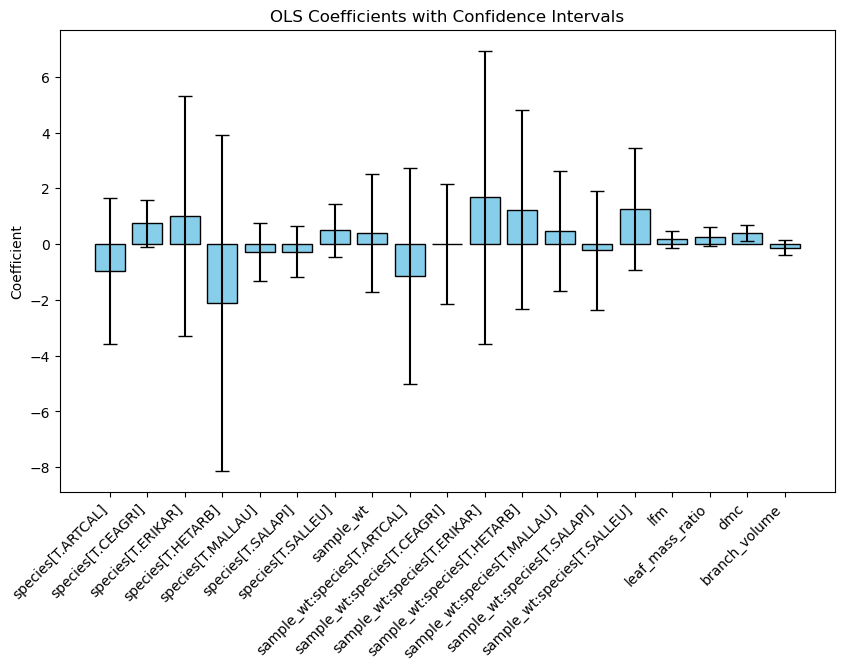

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     10.52
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           3.01e-14
Time:                        16:38:29   Log-Likelihood:                -189.70
No. Observations:                 166   AIC:                             403.4
Df Residuals:                     154   BIC:                             440.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0407      0.29

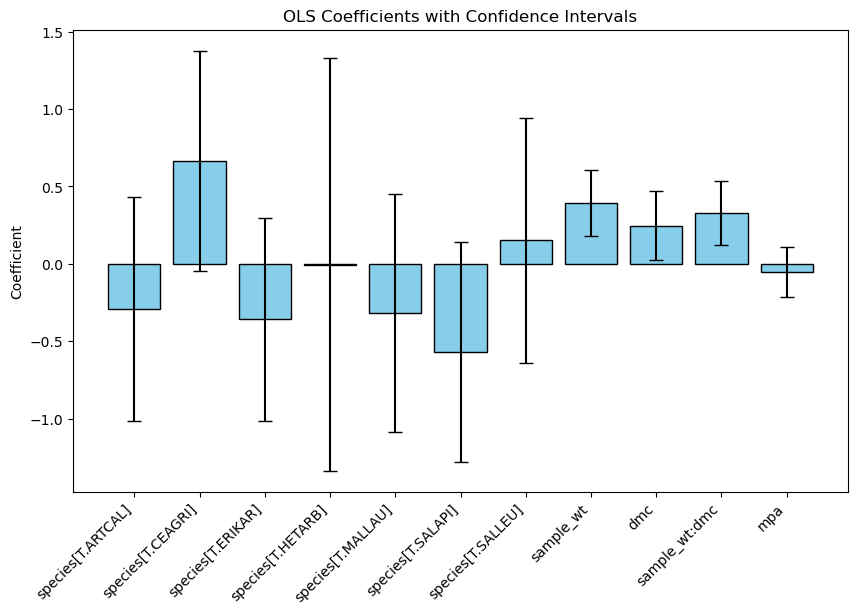

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     9.852
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           4.32e-14
Time:                        16:38:30   Log-Likelihood:                -188.69
No. Observations:                 166   AIC:                             403.4
Df Residuals:                     153   BIC:                             443.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0910      0.45

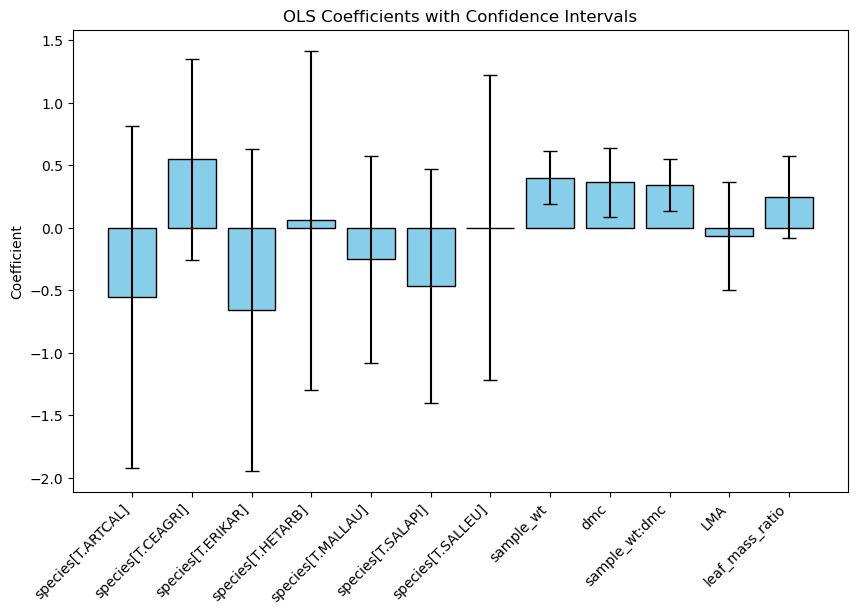

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     10.52
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           3.02e-14
Time:                        16:38:30   Log-Likelihood:                -189.70
No. Observations:                 166   AIC:                             403.4
Df Residuals:                     154   BIC:                             440.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0454      0.30

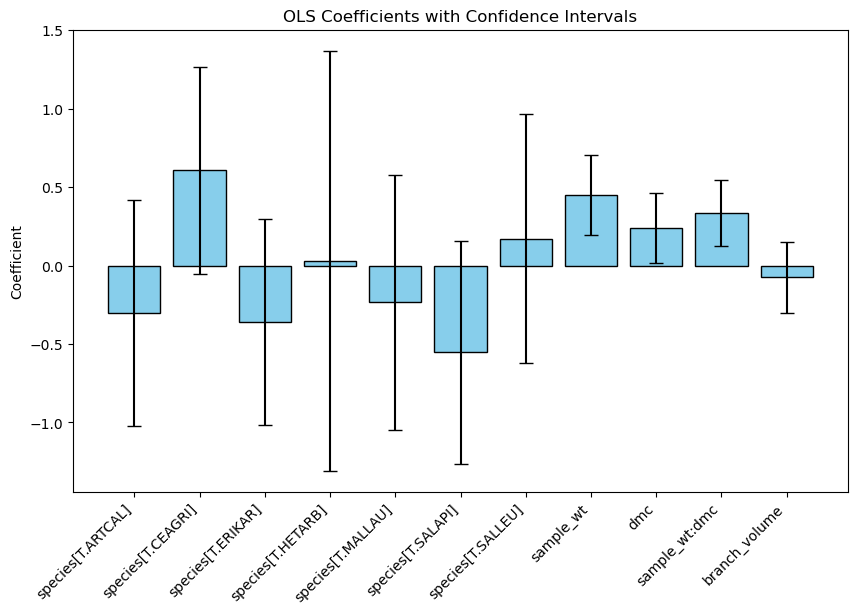

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     9.273
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           6.34e-14
Time:                        16:38:30   Log-Likelihood:                -187.74
No. Observations:                 166   AIC:                             403.5
Df Residuals:                     152   BIC:                             447.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0985      0.30

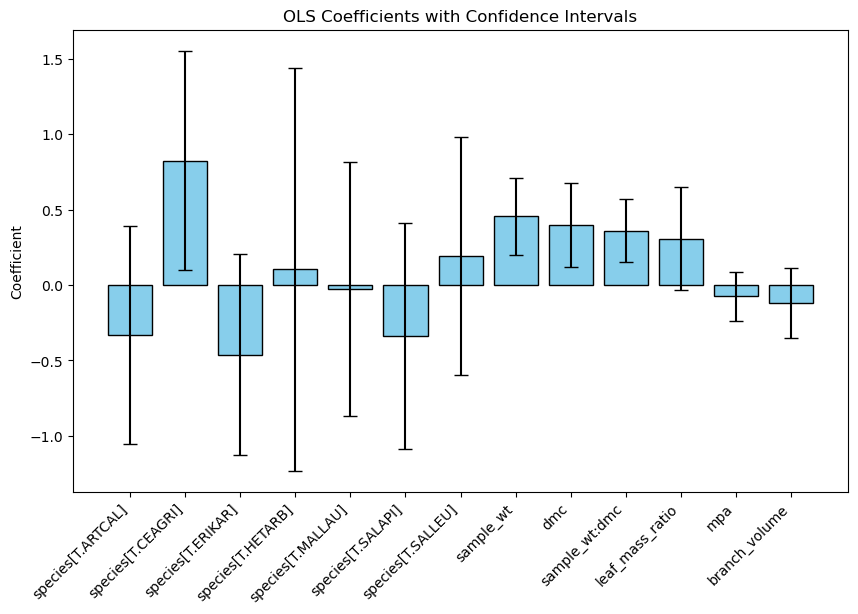

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     7.676
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           2.08e-13
Time:                        16:38:30   Log-Likelihood:                -183.74
No. Observations:                 166   AIC:                             403.5
Df Residuals:                     148   BIC:                             459.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

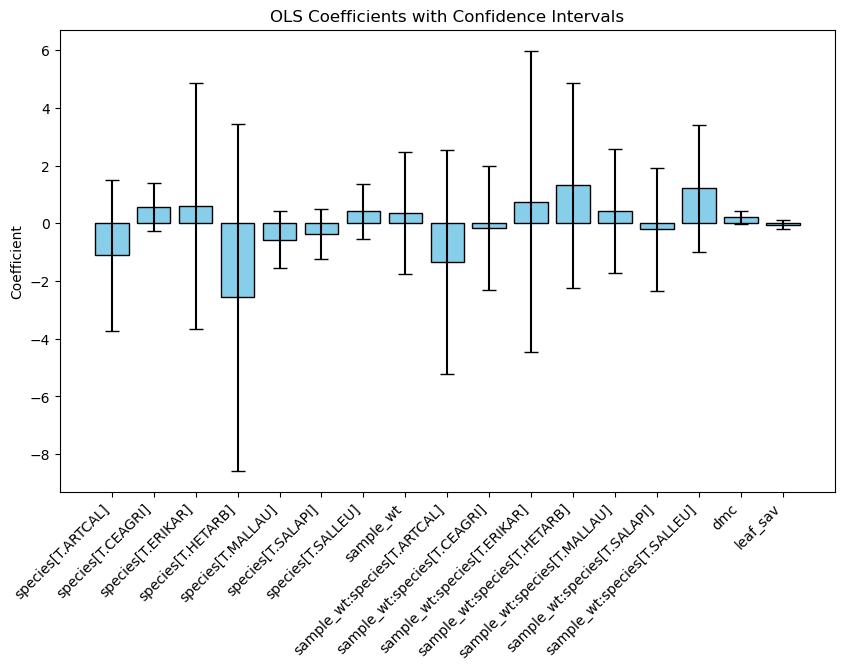

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     9.848
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           4.38e-14
Time:                        16:38:30   Log-Likelihood:                -188.71
No. Observations:                 166   AIC:                             403.4
Df Residuals:                     153   BIC:                             443.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0423      0.30

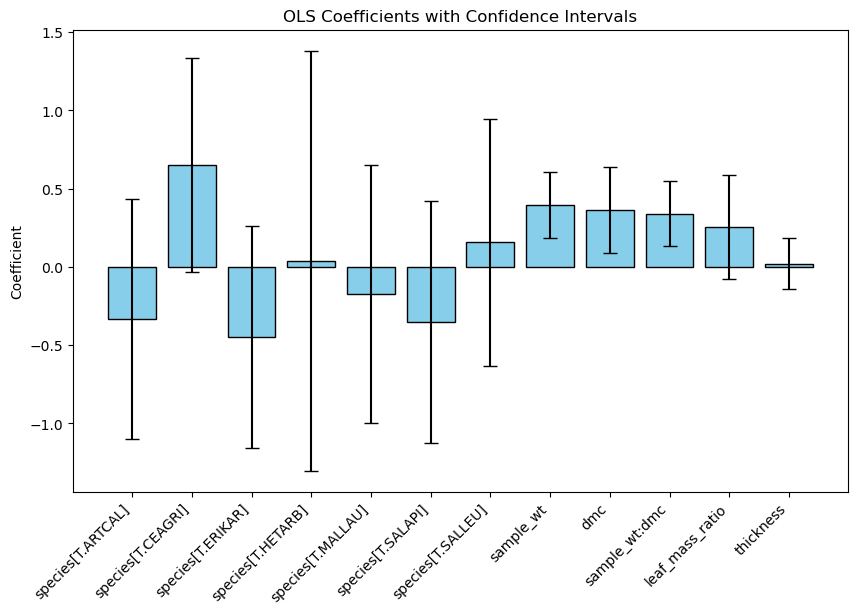

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     9.839
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           4.50e-14
Time:                        16:38:31   Log-Likelihood:                -188.74
No. Observations:                 166   AIC:                             403.5
Df Residuals:                     153   BIC:                             443.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0191      0.29

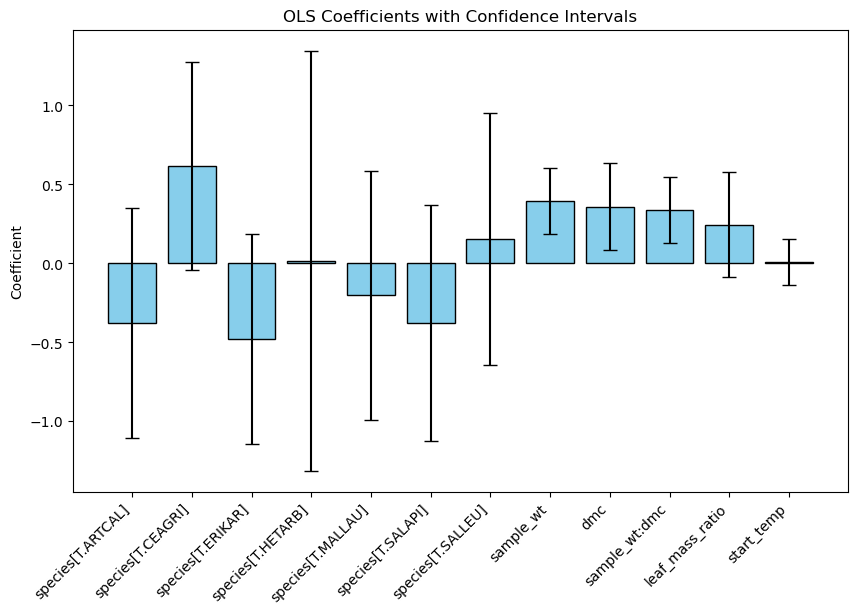

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     7.117
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           3.66e-13
Time:                        16:38:31   Log-Likelihood:                -181.80
No. Observations:                 166   AIC:                             403.6
Df Residuals:                     146   BIC:                             465.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

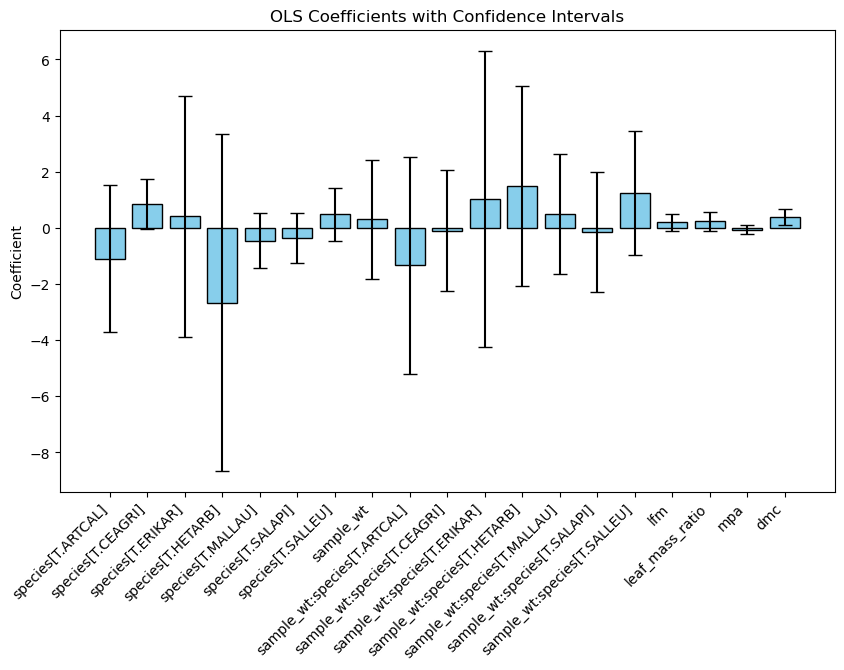

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     9.838
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           4.52e-14
Time:                        16:38:31   Log-Likelihood:                -188.74
No. Observations:                 166   AIC:                             403.5
Df Residuals:                     153   BIC:                             443.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0207      0.31

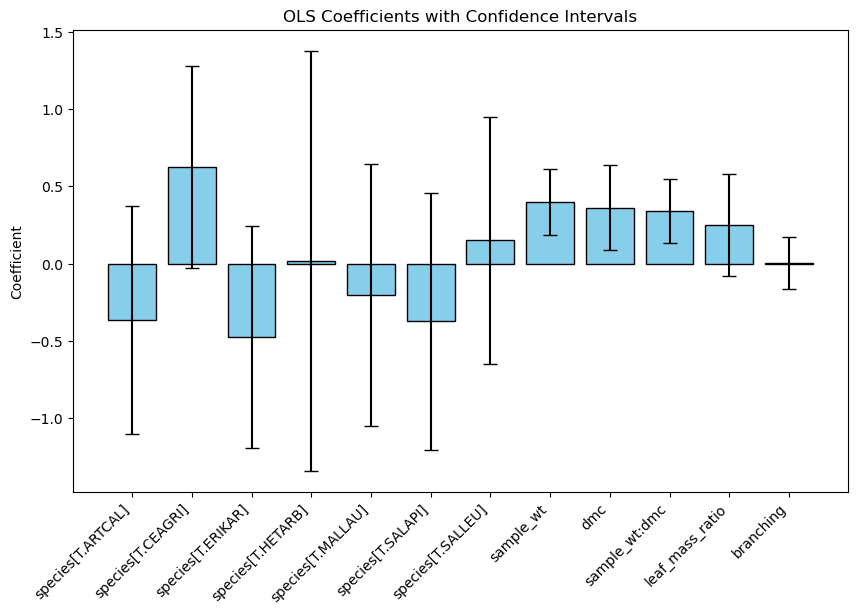

                            OLS Regression Results                            
Dep. Variable:                     fd   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     9.839
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           4.50e-14
Time:                        16:38:31   Log-Likelihood:                -188.74
No. Observations:                 166   AIC:                             403.5
Df Residuals:                     153   BIC:                             443.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0311      0.32

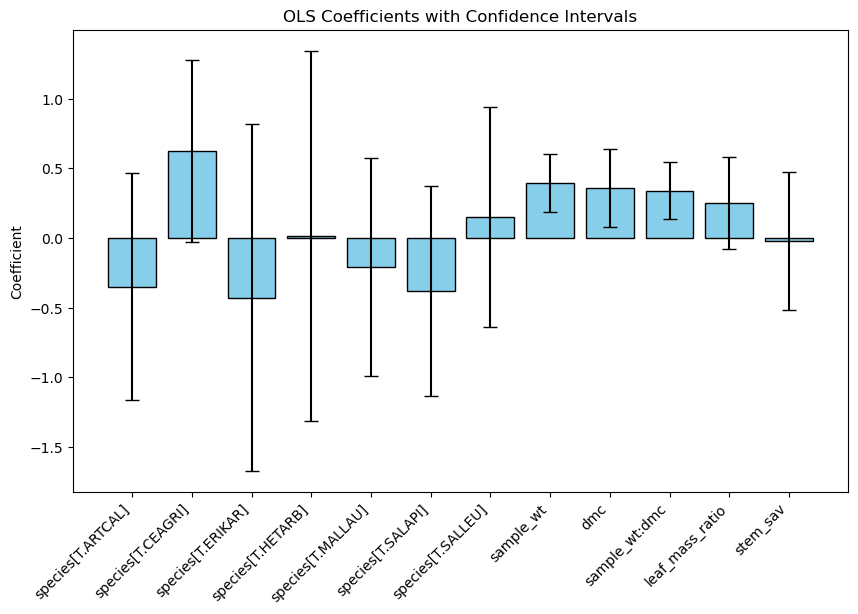

In [12]:
# generate list of formulas

df = flam
cols = cols_use
int_tuple_list = sig_interactions_tuples
dv = Y_VAR


formulas = []
cols_used = []

# iterate over possible interactions
for int_tup in int_tuple_list:
    
    # create a copy of singletons list
    cols_wkg = cols.copy()
    # isolate terms in interaction
    x1,x2 = int_tup
    # drop those terms from singletons list
    cols_wkg.remove(x1)
    cols_wkg.remove(x2)
    
    # add the 1st formula - just the interaction term y ~ x1 * x2
    formulas.append(dv+' ~ '+x1+'*'+x2)
    colsi = [x1,x2]

    # generate list of all possible combos of singletons, from 1 to as many as there are
    singles_combos = [list(combinations(cols_wkg, n)) for n in range(minnumsingle, maxnumsingle+1)]

    # iterate over combo set (ie 1 poss singleton, 2 poss singletons, ... etc)
    for comboset in singles_combos:
        # for each combo in the combo set
        for combo in comboset:
            # generate formula
            form = dv+' ~ '+x1+'*'+x2
            for single in combo:
                form+=' + '+single
                colsi.append(single)
            formulas.append(form)
            cols_used.append([colsi])

print(len(formulas))

# AIC ITERATION

resdf_fd, num_top_models = AICscore_from_all_pos_2way_interactions(df, formulas, report=0)

# report
for idx,row in resdf_fd[0:num_top_models].iterrows():
    formula = row.Formula
    print(formula)
for idx,row in resdf_fd[0:num_top_models].iterrows():
    formula = row.Formula
    model = smf.ols(formula, data=df)
    results = model.fit()
    print(results.summary())
    plot_ols_coefficients(results)
    plt.show();
    # if 'species' in cols:
    #     cols.remove('species')
    # plot_resid(df, cols, results)

# Temp Change

In [13]:
# REDUCE INTERACTIONS TO TEST

Y_VAR = 'temp_change'

# singletons: y = b + mx
compare_predictors_mixedeff(flam, cols_num_use, yvar=Y_VAR)

print('\n\n')

# singleton interactions: y = b + m1x1 + m2x2 + m3x1x2
sig_interactions = compare_predictors_interaction_singletons(flam,cols_use, y=Y_VAR, thresh=0.05, 
                                                             probs = ['temp_change ~ leaf_sav*thickness'], printsumm=0)

print('\n\n')

# # try all 2-way interactions in 1 model
# form_all_int = formula_all_2way_interactions(cols_use, y='fh', report=0)
# model = smf.mixedlm(form_all_int, data=flam, groups=flam["plant_id"])
# result = model.fit(reml=False)
# # print only significant results
# significant_results = result.summary().tables[1].loc[result.pvalues < 0.05]
# print(significant_results)

print('\n\n')

# generate list of known interactions

sig_interactions_tuples = [tuple(x.split('*')) for x in sig_interactions]
for pair in sig_interactions_tuples:
    print(pair)

               cols     pvals     coefs  significant
6        start_temp  0.000017 -0.320890         True
1               LMA  0.000019  0.534923         True
2         sample_wt  0.000258  0.282132         True
4         branching  0.002838  0.196010         True
0               lfm  0.010824 -0.382844         True
10         leaf_sav  0.020611 -0.333811         True
9          stem_sav  0.022272 -0.380000         True
5               mpa  0.036702  0.162373         True
7               dmc  0.049687  0.193818         True
8     branch_volume  0.050270  0.146199        False
11        thickness  0.115967  0.208315        False
3   leaf_mass_ratio  0.138911 -0.208767        False



13 13 {'leaf_sav', 'branching', 'thickness', 'stem_sav', 'LMA', 'mpa', 'sample_wt', 'branch_volume', 'start_temp', 'leaf_mass_ratio', 'species', 'dmc', 'lfm'}






('lfm', 'LMA')
('lfm', 'sample_wt')
('lfm', 'start_temp')
('lfm', 'leaf_sav')
('lfm', 'species')
('LMA', 'species')
('sample_wt', 'start_temp')

25600
ERROR: Formula model error: temp_change ~ LMA*species + lfm + sample_wt + mpa + start_temp
ERROR: Formula model error: temp_change ~ LMA*species + lfm + leaf_mass_ratio + mpa + dmc
ERROR: Formula model error: temp_change ~ LMA*species + lfm + start_temp + branch_volume + stem_sav
ERROR: Formula model error: temp_change ~ LMA*species + lfm + branch_volume + leaf_sav + thickness
ERROR: Formula model error: temp_change ~ LMA*species + sample_wt + leaf_mass_ratio + mpa + thickness
ERROR: Formula model error: temp_change ~ LMA*species + sample_wt + leaf_mass_ratio + start_temp + leaf_sav
ERROR: Formula model error: temp_change ~ LMA*species + sample_wt + branching + start_temp + dmc
ERROR: Formula model error: temp_change ~ LMA*species + sample_wt + branching + start_temp + leaf_sav
ERROR: Formula model error: temp_change ~ LMA*species + leaf_mass_ratio + branching + mpa + thickness
ERROR: Formula model error: temp_change ~ LMA*species + leaf_mass_ratio + branching + start_temp + leaf

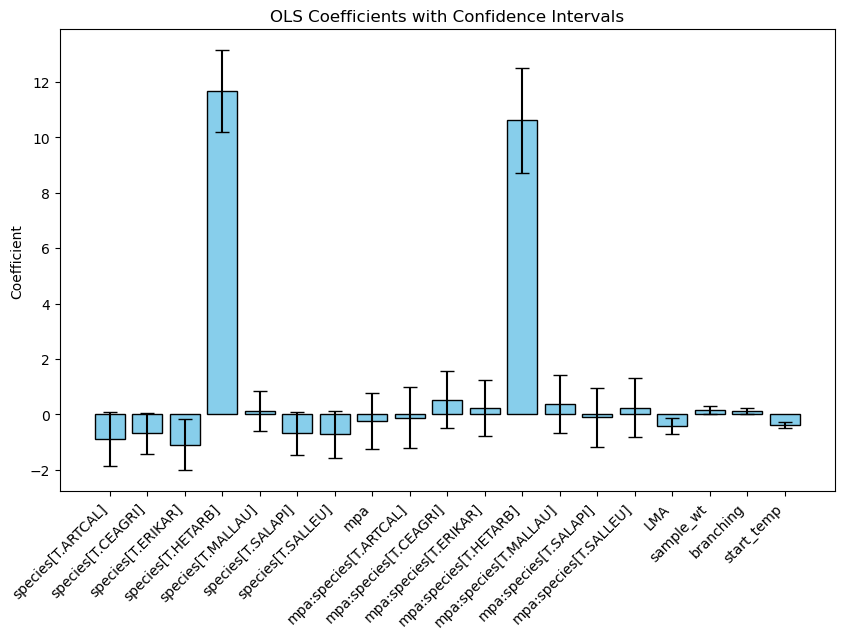

                            OLS Regression Results                            
Dep. Variable:            temp_change   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     26.30
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.83e-38
Time:                        17:27:08   Log-Likelihood:                -109.38
No. Observations:                 166   AIC:                             260.8
Df Residuals:                     145   BIC:                             326.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

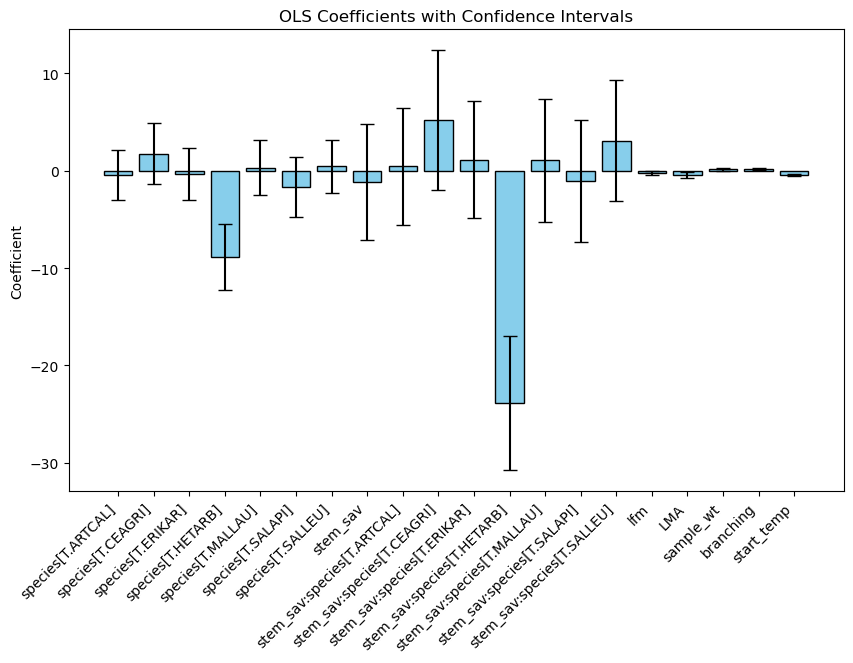

                            OLS Regression Results                            
Dep. Variable:            temp_change   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     26.19
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           2.34e-38
Time:                        17:27:08   Log-Likelihood:                -109.68
No. Observations:                 166   AIC:                             261.4
Df Residuals:                     145   BIC:                             326.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.49

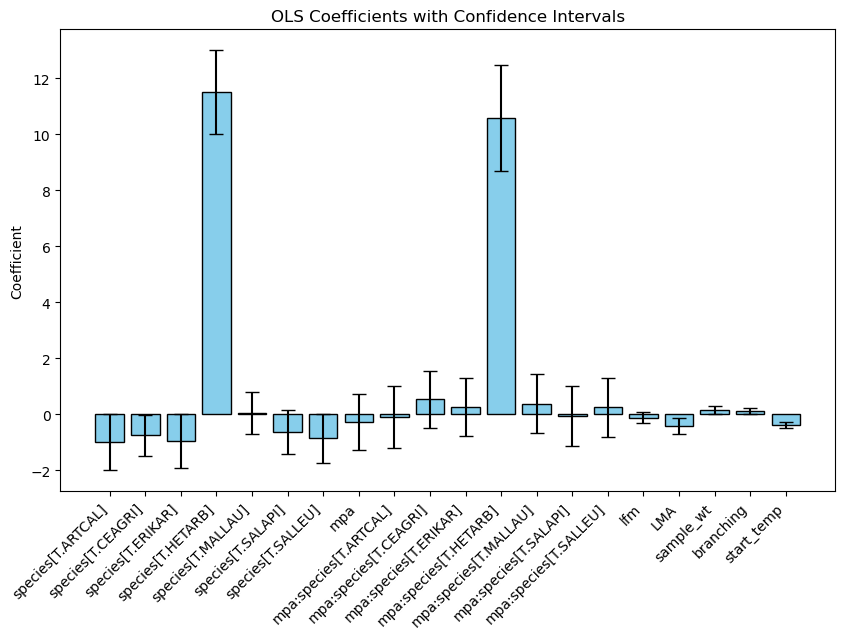

                            OLS Regression Results                            
Dep. Variable:            temp_change   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     26.03
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           3.25e-38
Time:                        17:27:08   Log-Likelihood:                -110.06
No. Observations:                 166   AIC:                             262.1
Df Residuals:                     145   BIC:                             327.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.51

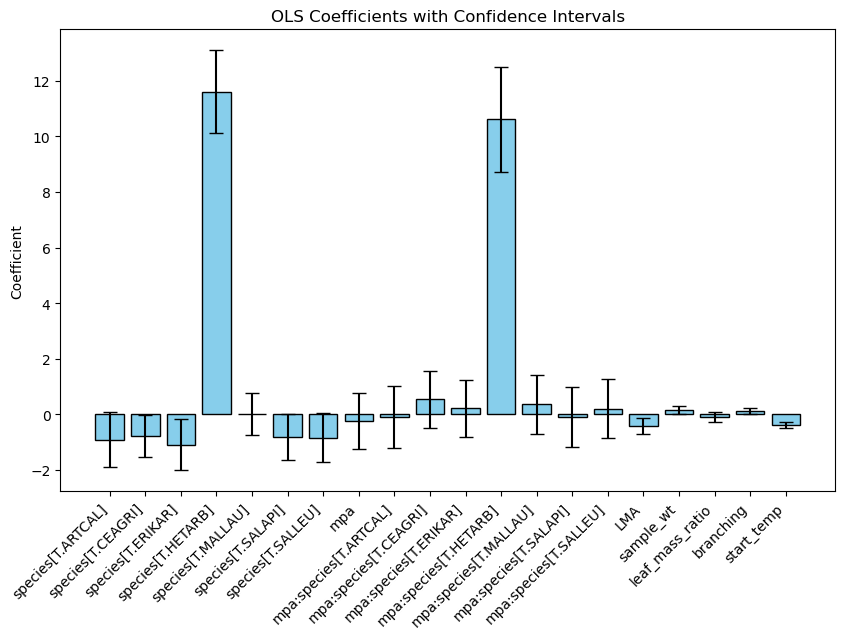

                            OLS Regression Results                            
Dep. Variable:            temp_change   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     25.91
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           4.16e-38
Time:                        17:27:09   Log-Likelihood:                -110.36
No. Observations:                 166   AIC:                             262.7
Df Residuals:                     145   BIC:                             328.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.50

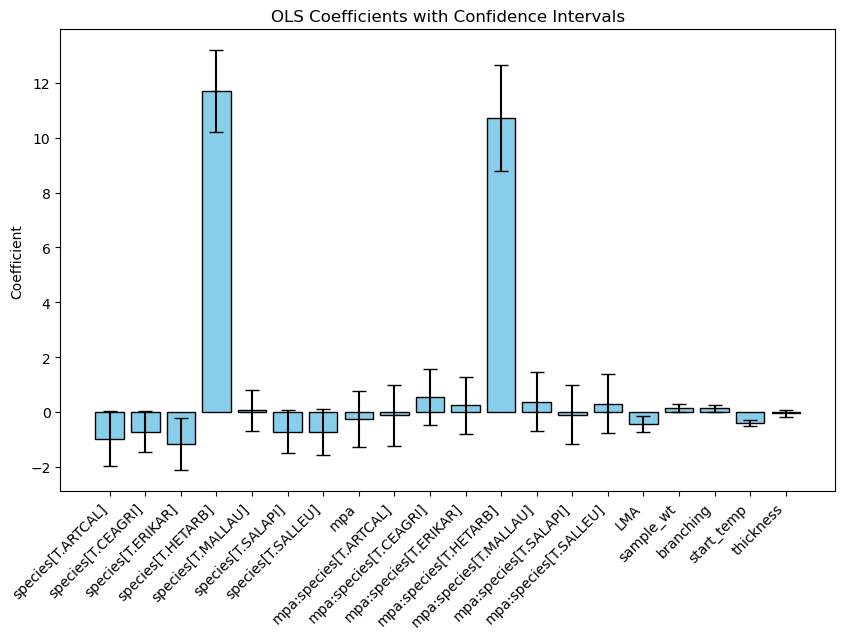

                            OLS Regression Results                            
Dep. Variable:            temp_change   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     25.90
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           4.30e-38
Time:                        17:27:09   Log-Likelihood:                -110.40
No. Observations:                 166   AIC:                             262.8
Df Residuals:                     145   BIC:                             328.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.43

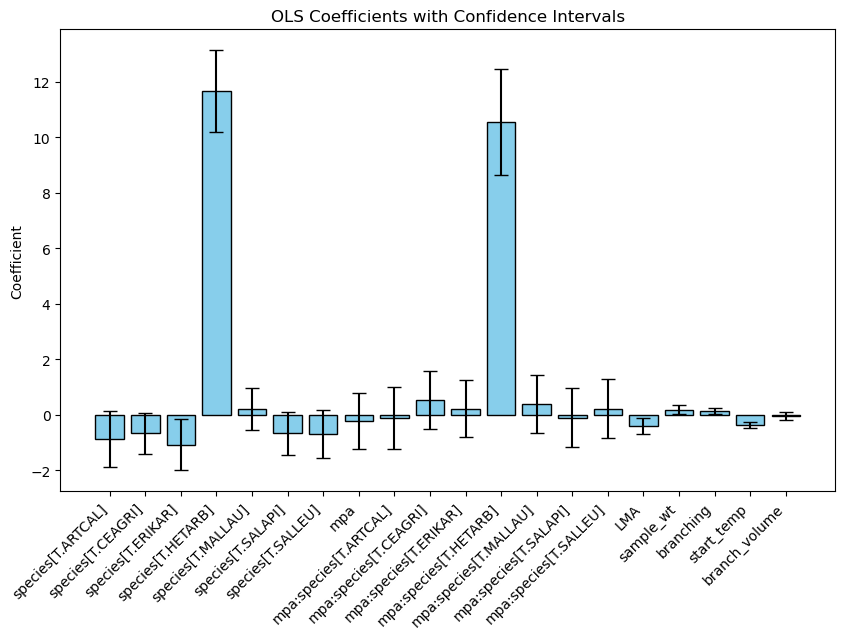

                            OLS Regression Results                            
Dep. Variable:            temp_change   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     25.94
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           3.90e-38
Time:                        17:27:09   Log-Likelihood:                -110.28
No. Observations:                 166   AIC:                             262.6
Df Residuals:                     145   BIC:                             327.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

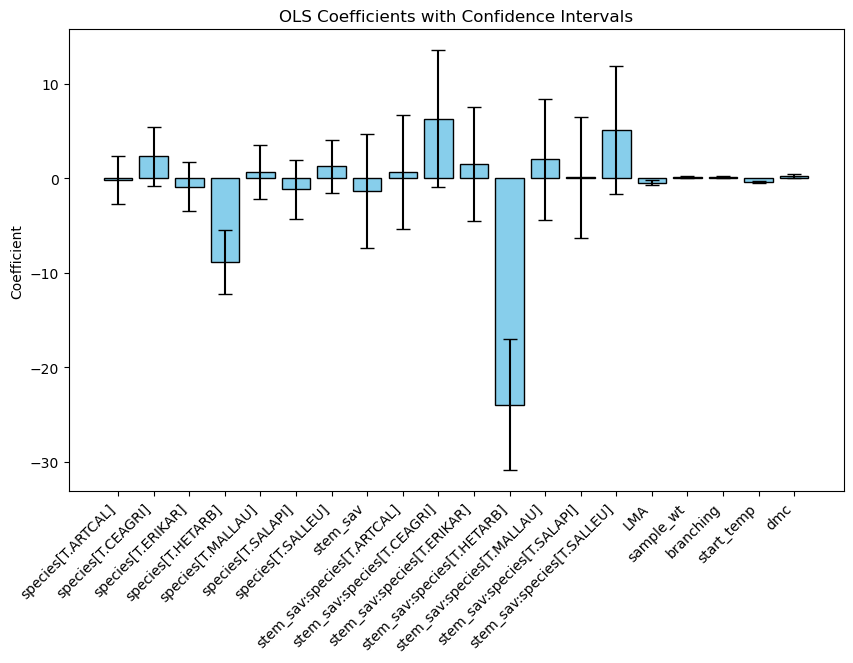

                            OLS Regression Results                            
Dep. Variable:            temp_change   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     25.84
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           4.90e-38
Time:                        17:27:09   Log-Likelihood:                -110.55
No. Observations:                 166   AIC:                             263.1
Df Residuals:                     145   BIC:                             328.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

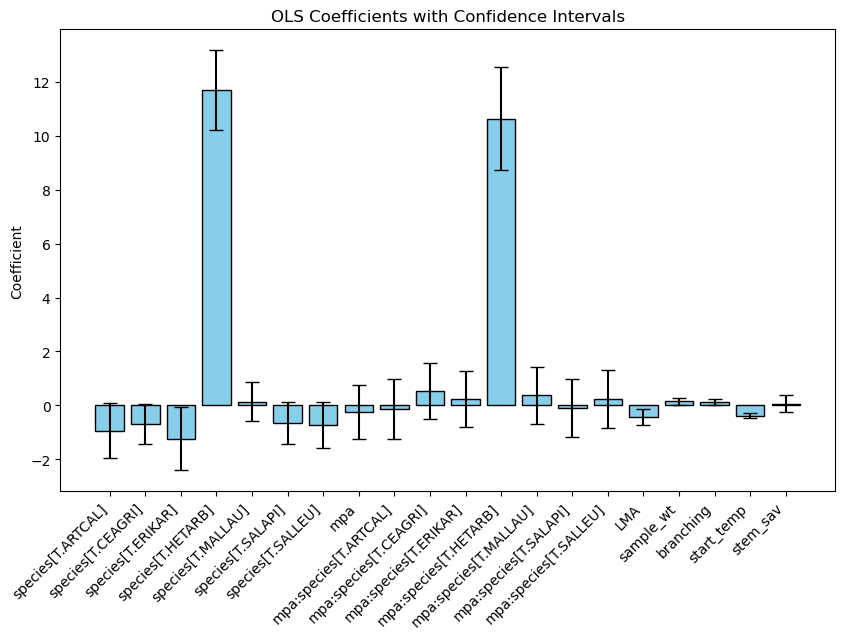

                            OLS Regression Results                            
Dep. Variable:            temp_change   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     25.81
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           5.16e-38
Time:                        17:27:10   Log-Likelihood:                -110.61
No. Observations:                 166   AIC:                             263.2
Df Residuals:                     145   BIC:                             328.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.47

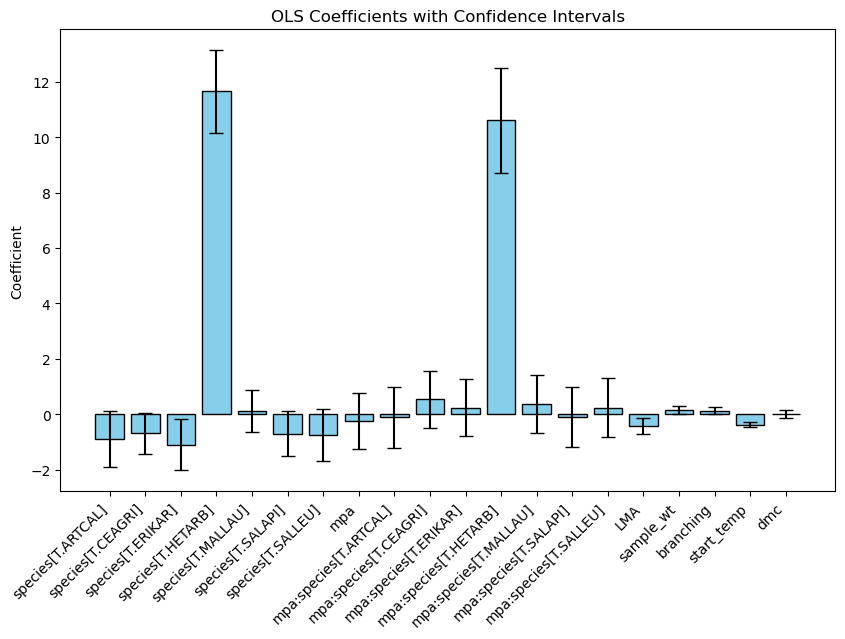

                            OLS Regression Results                            
Dep. Variable:            temp_change   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     25.80
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           5.25e-38
Time:                        17:27:10   Log-Likelihood:                -110.63
No. Observations:                 166   AIC:                             263.3
Df Residuals:                     145   BIC:                             328.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.45

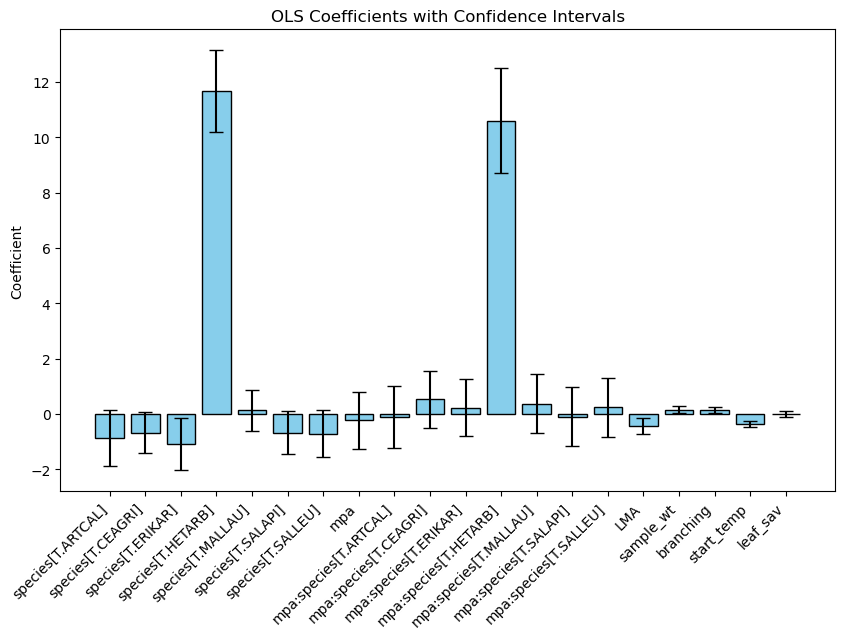

In [14]:
# generate list of formulas

df = flam
cols = cols_use
int_tuple_list = sig_interactions_tuples
dv = Y_VAR


formulas = []
cols_used = []

# iterate over possible interactions
for int_tup in int_tuple_list:
    
    # create a copy of singletons list
    cols_wkg = cols.copy()
    # isolate terms in interaction
    x1,x2 = int_tup
    # drop those terms from singletons list
    cols_wkg.remove(x1)
    cols_wkg.remove(x2)
    
    # add the 1st formula - just the interaction term y ~ x1 * x2
    formulas.append(dv+' ~ '+x1+'*'+x2)
    colsi = [x1,x2]

    # generate list of all possible combos of singletons, from 1 to as many as there are
    singles_combos = [list(combinations(cols_wkg, n)) for n in range(minnumsingle, maxnumsingle+1)]

    # iterate over combo set (ie 1 poss singleton, 2 poss singletons, ... etc)
    for comboset in singles_combos:
        # for each combo in the combo set
        for combo in comboset:
            # generate formula
            form = dv+' ~ '+x1+'*'+x2
            for single in combo:
                form+=' + '+single
                colsi.append(single)
            formulas.append(form)
            cols_used.append([colsi])

print(len(formulas))

# AIC ITERATION
probs = ['temp_change ~ LMA*species + leaf_mass_ratio + dmc',
        'temp_change ~ LMA*species + leaf_mass_ratio + start_temp + thickness',
        'temp_change ~ LMA*species + branching + dmc + leaf_sav',
        'temp_change ~ LMA*species + start_temp + branch_volume + stem_sav',
        'temp_change ~ LMA*species + start_temp + stem_sav + leaf_sav',
        'temp_change ~ LMA*species + lfm + sample_wt + leaf_mass_ratio + mpa']

for prob in probs:
    formulas.remove(prob)
    
resdf_tc, num_top_models = AICscore_from_all_pos_2way_interactions(df, formulas, report=0)

# report
for idx,row in resdf_tc[0:num_top_models].iterrows():
    formula = row.Formula
    print(formula)
for idx,row in resdf_tc[0:num_top_models].iterrows():
    formula = row.Formula
    model = smf.ols(formula, data=df)
    results = model.fit()
    print(results.summary())
    plot_ols_coefficients(results)
    plt.show();
    # if 'species' in cols:
    #     cols.remove('species')
    # plot_resid(df, cols, results)

# Heat Flux Change

In [15]:
# REDUCE INTERACTIONS TO TEST

Y_VAR = 'heat_flux_change'

# singletons: y = b + mx
compare_predictors_mixedeff(flam, cols_num_use, yvar=Y_VAR)

print('\n\n')

# singleton interactions: y = b + m1x1 + m2x2 + m3x1x2
sig_interactions = compare_predictors_interaction_singletons(flam,cols_use, y=Y_VAR, thresh=0.05, probs = [], printsumm=0)

print('\n\n')

# # try all 2-way interactions in 1 model
# form_all_int = formula_all_2way_interactions(cols_use, y='fh', report=0)
# model = smf.mixedlm(form_all_int, data=flam, groups=flam["plant_id"])
# result = model.fit(reml=False)
# # print only significant results
# significant_results = result.summary().tables[1].loc[result.pvalues < 0.05]
# print(significant_results)

print('\n\n')

# generate list of known interactions

sig_interactions_tuples = [tuple(x.split('*')) for x in sig_interactions]
for pair in sig_interactions_tuples:
    print(pair)

               cols         pvals     coefs  significant
2         sample_wt  4.833183e-25  0.670656         True
8     branch_volume  2.758968e-09  0.438674         True
1               LMA  2.433891e-08  0.481080         True
9          stem_sav  8.420917e-05 -0.378518         True
3   leaf_mass_ratio  3.820173e-04 -0.404141         True
10         leaf_sav  8.635177e-04 -0.335408         True
0               lfm  5.211122e-03 -0.285119         True
7               dmc  1.135685e-02  0.240699         True
4         branching  1.403803e-02  0.194726         True
11        thickness  1.707630e-01  0.154728        False
6        start_temp  2.560324e-01  0.101154        False
5               mpa  8.944642e-01 -0.011634        False



13 10 {'thickness', 'stem_sav', 'LMA', 'sample_wt', 'branch_volume', 'leaf_mass_ratio', 'start_temp', 'species', 'dmc', 'lfm'}






('lfm', 'dmc')
('LMA', 'branch_volume')
('sample_wt', 'leaf_mass_ratio')
('sample_wt', 'dmc')
('sample_wt', 'stem_sav')
('l

13312
13312 13312
heat_flux_change ~ sample_wt*leaf_mass_ratio + lfm + LMA + start_temp + leaf_sav + species
heat_flux_change ~ sample_wt*leaf_mass_ratio + lfm + LMA + start_temp + species
                            OLS Regression Results                            
Dep. Variable:       heat_flux_change   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     16.42
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           7.97e-24
Time:                        17:52:36   Log-Likelihood:                -159.27
No. Observations:                 166   AIC:                             348.5
Df Residuals:                     151   BIC:                             395.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     

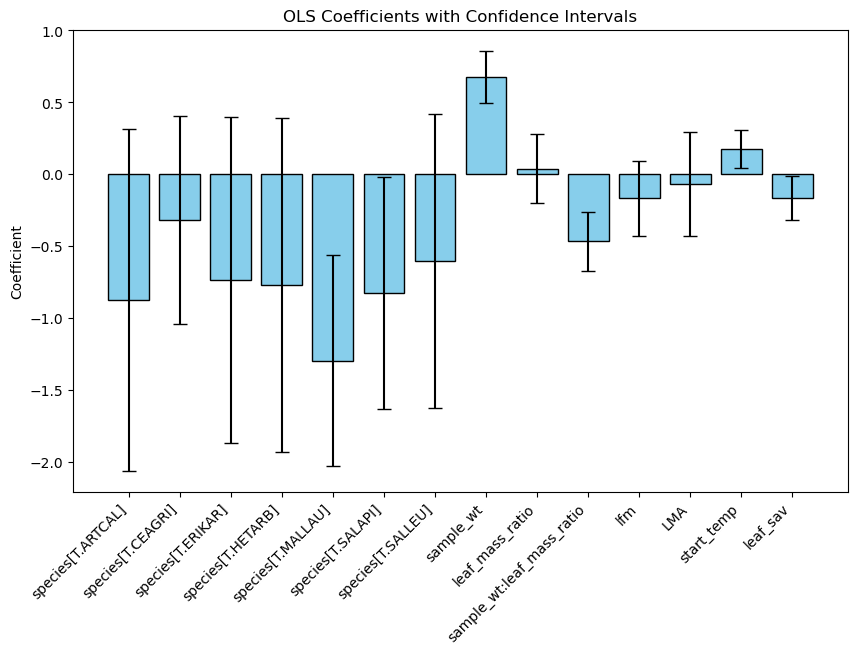

                            OLS Regression Results                            
Dep. Variable:       heat_flux_change   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     16.90
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.74e-23
Time:                        17:52:36   Log-Likelihood:                -161.85
No. Observations:                 166   AIC:                             351.7
Df Residuals:                     152   BIC:                             395.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

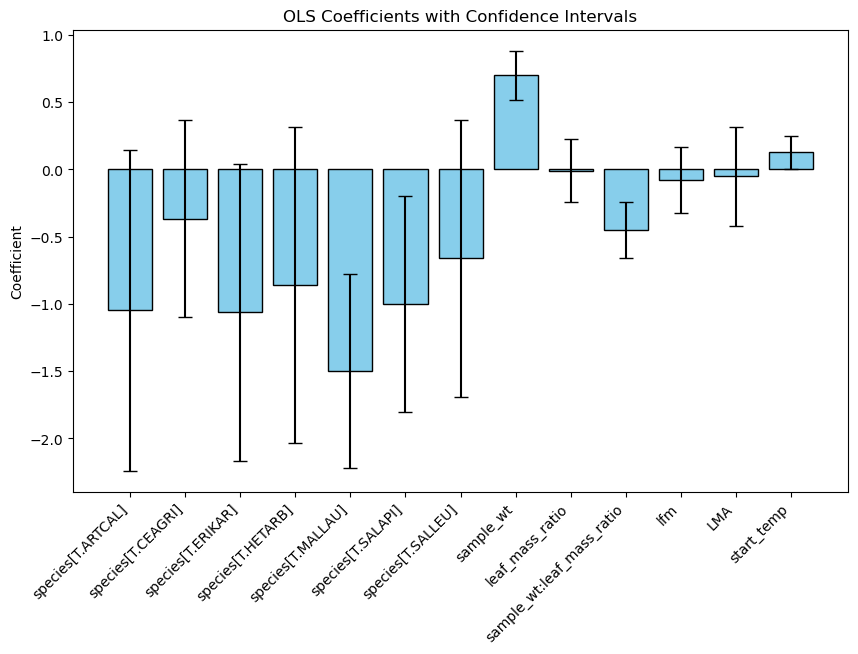

In [16]:
# generate list of formulas

df = flam
cols = cols_use
int_tuple_list = sig_interactions_tuples
dv = Y_VAR


formulas = []
cols_used = []

# iterate over possible interactions
for int_tup in int_tuple_list:
    
    # create a copy of singletons list
    cols_wkg = cols.copy()
    # isolate terms in interaction
    x1,x2 = int_tup
    # drop those terms from singletons list
    cols_wkg.remove(x1)
    cols_wkg.remove(x2)
    
    # add the 1st formula - just the interaction term y ~ x1 * x2
    formulas.append(dv+' ~ '+x1+'*'+x2)
    colsi = [x1,x2]

    # generate list of all possible combos of singletons, from 1 to as many as there are
    singles_combos = [list(combinations(cols_wkg, n)) for n in range(minnumsingle, maxnumsingle+1)]

    # iterate over combo set (ie 1 poss singleton, 2 poss singletons, ... etc)
    for comboset in singles_combos:
        # for each combo in the combo set
        for combo in comboset:
            # generate formula
            form = dv+' ~ '+x1+'*'+x2
            for single in combo:
                form+=' + '+single
                colsi.append(single)
            formulas.append(form)
            cols_used.append([colsi])

print(len(formulas))

# AIC ITERATION
resdf_hx, num_top_models = AICscore_from_all_pos_2way_interactions(df, formulas, report=0)

# report
for idx,row in resdf_hx[0:num_top_models].iterrows():
    formula = row.Formula
    print(formula)
for idx,row in resdf_hx[0:num_top_models].iterrows():
    formula = row.Formula
    model = smf.ols(formula, data=df)
    results = model.fit()
    print(results.summary())
    plot_ols_coefficients(results)
    plt.show();
    # if 'species' in cols:
    #     cols.remove('species')
    # plot_resid(df, cols, results)